## 나눔고딕 설치 확인

In [12]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

['Nanum Brush Script',
 'Nanum Pen Script',
 'NanumGothic',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumGothic']

## AutoML h2o 설치 확인

In [13]:
import h2o
h2o.init()
print(h2o.__version__)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "17.0.8" 2023-07-18; OpenJDK Runtime Environment (build 17.0.8+7-Debian-1deb12u1); OpenJDK 64-Bit Server VM (build 17.0.8+7-Debian-1deb12u1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpokx_slyu
  JVM stdout: /tmp/tmpokx_slyu/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpokx_slyu/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_unknownUser_8edtq0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


3.42.0.3


## 필요 라이브러리 import

In [78]:
import os
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 폰트, 마이너스 설정
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [5]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## 데이터 타입 확인

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## 데이터 null값 확인

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## 데이터 각 컬럼 고유값 개수 확인

In [9]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

## 데이터 최빈값 확인

In [15]:
df.mode().T

,0
class,e
cap-shape,x
cap-surface,y
cap-color,n
bruises,f
odor,n
gill-attachment,f
gill-spacing,c
gill-size,b
gill-color,b


## 컬럼명 한국어로 변환 *

![mushroom.jpg](structure_of_mushrooms.jpg)

- 주름살 (gill) 생식세포인 홀씨를 생성하는 버섯의 한 부분. 갓의 아랫면에 있다.

- 대주머니 / 균포 (volva) 미성숙한 버섯을 완전히 감싸고 있던 막이 줄기가 생장함에 따라 찢어진 흔적.

- 균사 / 팡이실 (hypha) 간혹 흰색을 띠는 미세한 사상체. 버섯의 생장에 필요한 물과 유기물질을 흡수한다.

- 균사체 (mycelium) 홀씨의 발아를 통해 생성된 균사가 서로 얽힌 집합체. 여기에서 버섯의 지상 부분이 발달한다.

- 홀씨 / 포자 (spores) 일반적으로 대기로 방출된 뒤 기질에 떨어져서 새로운 버섯이 생겨나게 하는 미세한 생식세포.

- 줄기 (stem) 버섯의 갓을 지지하는 기둥.

- 턱받이 (ring) 갓의 아래에서 줄기를 둘러싼 막. 미성숙한 버섯의 주름살을 감싸고 있다가 갓이 성장하면서 파열된 막의 흔적이다.

- 갓 (cap) 형태와 색상이 다양한 버섯의 상단부. 주름살을 보호한다. 대개 머리에 쓰는 모자를 닮은 형태를 띠는 데서 그 이름이 비롯되었다.

In [17]:
df.columns = [
    "분류", 
    "갓의 형태", 
    "갓의 표면", 
    "갓의 색상", 
    "멍자국", 
    "냄새", 
    "주름살 부착 방식", 
    "주름살 간격", 
    "주름살 크기", 
    "주름살 색상", 
    "줄기의 형태", 
    "줄기의 뿌리", 
    "턱받이 위의 줄기 표면", 
    "턱받이 아래의 줄기 표면", 
    "턱받이 위의 줄기 색상", 
    "턱받이 아래의 줄기 색상", 
    "피막 종류", 
    "피막 색상", 
    "턱받이 개수", 
    "턱받이 타입", 
    "포자 무늬", 
    "개체 수", 
    "서식지"
]

In [18]:
df

,분류,갓의 형태,갓의 표면,갓의 색상,멍자국,냄새,주름살 부착 방식,주름살 간격,주름살 크기,주름살 색상,...,턱받이 아래의 줄기 표면,턱받이 위의 줄기 색상,턱받이 아래의 줄기 색상,피막 종류,피막 색상,턱받이 개수,턱받이 타입,포자 무늬,개체 수,서식지
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [45]:
col_list = df.columns.tolist()

low = []
up = []

for col1 in col_list:
    for col2 in col_list:
        if col1 != col2:
            df_cross = pd.crosstab(df[col1], df[col2])
            df_cont = stats.chi2_contingency(df_cross)
            print(f'\n\033[1m{col1} X {col2}\033[0m'.center(40))
            display(df_cross)
            print(f'P_value : {df_cont.pvalue}')
            if df_cont.pvalue < 0.5:
                low.append(f'{col1} X {col2} : {df_cont.pvalue}')
            else:
                 up.append(f'{col1} X {col2} : {df_cont.pvalue}')

          
분류 X 갓의 형태           


갓의 형태,b,c,f,k,s,x
분류,,,,,,
e,404,0,1596,228,32,1948
p,48,4,1556,600,0,1708


P_value : 1.1964565685935438e-103
          
분류 X 갓의 표면           


갓의 표면,f,g,s,y
분류,,,,
e,1560,0,1144,1504
p,760,4,1412,1740


P_value : 5.518427038649143e-68
          
분류 X 갓의 색상           


갓의 색상,b,c,e,g,n,p,r,u,w,y
분류,,,,,,,,,,
e,48,32,624,1032,1264,56,16,16,720,400
p,120,12,876,808,1020,88,0,0,320,672


P_value : 6.055814598336576e-78
           
분류 X 멍자국            


멍자국,f,t
분류,,
e,1456,2752
p,3292,624


P_value : 0.0
            
분류 X 냄새            


냄새,a,c,f,l,m,n,p,s,y
분류,,,,,,,,,
e,400,0,0,400,0,3408,0,0,0
p,0,192,2160,0,36,120,256,576,576


P_value : 0.0
        
분류 X 주름살 부착 방식         


주름살 부착 방식,a,f
분류,,
e,192,4016
p,18,3898


P_value : 5.501707411861009e-31
          
분류 X 주름살 간격          


주름살 간격,c,w
분류,,
e,3008,1200
p,3804,112


P_value : 5.0229776137324786e-216
          
분류 X 주름살 크기          


주름살 크기,b,n
분류,,
e,3920,288
p,1692,2224


P_value : 0.0
          
분류 X 주름살 색상          


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
분류,,,,,,,,,,,,
e,0,96,248,204,344,936,64,852,0,444,956,64
p,1728,0,504,528,64,112,0,640,24,48,246,22


P_value : 0.0
          
분류 X 줄기의 형태          


줄기의 형태,e,t
분류,,
e,1616,2592
p,1900,2016


P_value : 4.604746212155192e-20
          
분류 X 줄기의 뿌리          


줄기의 뿌리,?,b,c,e,r
분류,,,,,
e,720,1920,512,864,192
p,1760,1856,44,256,0


P_value : 7.702047904943513e-290
       
분류 X 턱받이 위의 줄기 표면       


턱받이 위의 줄기 표면,f,k,s,y
분류,,,,
e,408,144,3640,16
p,144,2228,1536,8


P_value : 0.0
      
분류 X 턱받이 아래의 줄기 표면       


턱받이 아래의 줄기 표면,f,k,s,y
분류,,,,
e,456,144,3400,208
p,144,2160,1536,76


P_value : 0.0
       
분류 X 턱받이 위의 줄기 색상       


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
분류,,,,,,,,,
e,0,0,96,576,16,192,576,2752,0
p,432,36,0,0,432,0,1296,1712,8


P_value : 0.0
      
분류 X 턱받이 아래의 줄기 색상       


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
분류,,,,,,,,,
e,0,0,96,576,64,192,576,2704,0
p,432,36,0,0,448,0,1296,1680,24


P_value : 0.0
          
분류 X 피막 종류           


피막 종류,p
분류,
e,4208
p,3916


P_value : 1.0
          
분류 X 피막 색상           


피막 색상,n,o,w,y
분류,,,,
e,96,96,4016,0
p,0,0,3908,8


P_value : 3.32097274916963e-41
          
분류 X 턱받이 개수          


턱받이 개수,n,o,t
분류,,,
e,0,3680,528
p,36,3808,72


P_value : 4.23575764172306e-82
          
분류 X 턱받이 타입          


턱받이 타입,e,f,l,n,p
분류,,,,,
e,1008,48,0,0,3152
p,1768,0,1296,36,816


P_value : 0.0
          
분류 X 포자 무늬           


포자 무늬,b,h,k,n,o,r,u,w,y
분류,,,,,,,,,
e,48,48,1648,1744,48,0,48,576,48
p,0,1584,224,224,0,72,0,1812,0


P_value : 0.0
           
분류 X 개체 수           


개체 수,a,c,n,s,v,y
분류,,,,,,
e,384,288,400,880,1192,1064
p,0,52,0,368,2848,648


P_value : 0.0
           
분류 X 서식지            


서식지,d,g,l,m,p,u,w
분류,,,,,,,
e,1880,1408,240,256,136,96,192
p,1268,740,592,36,1008,272,0


P_value : 0.0
          
갓의 형태 X 분류           


분류,e,p
갓의 형태,,
b,404,48
c,0,4
f,1596,1556
k,228,600
s,32,0
x,1948,1708


P_value : 1.196456568593578e-103
         
갓의 형태 X 갓의 표면         


갓의 표면,f,g,s,y
갓의 형태,,,,
b,52,1,244,155
c,0,1,0,3
f,1016,1,820,1315
k,60,1,418,349
s,32,0,0,0
x,1160,0,1074,1422


P_value : 4.635777687474702e-206
         
갓의 형태 X 갓의 색상         


갓의 색상,b,c,e,g,n,p,r,u,w,y
갓의 형태,,,,,,,,,,
b,12,0,0,48,56,12,0,0,190,134
c,0,0,0,0,0,0,0,0,2,2
f,76,16,596,808,920,32,8,8,286,402
k,16,12,308,48,372,16,0,0,50,6
s,0,0,0,16,16,0,0,0,0,0
x,64,16,596,920,920,84,8,8,512,528


P_value : 1.2499748358068987e-220
          
갓의 형태 X 멍자국          


멍자국,f,t
갓의 형태,,
b,158,294
c,2,2
f,1754,1398
k,762,66
s,32,0
x,2040,1616


P_value : 1.8111194837838204e-112
          
갓의 형태 X 냄새           


냄새,a,c,f,l,m,n,p,s,y
갓의 형태,,,,,,,,,
b,128,0,0,128,0,196,0,0,0
c,0,0,0,0,0,4,0,0,0
f,72,0,984,72,12,1500,128,192,192
k,0,0,192,0,12,240,0,192,192
s,0,0,0,0,0,32,0,0,0
x,200,192,984,200,12,1556,128,192,192


P_value : 0.0
       
갓의 형태 X 주름살 부착 방식       


주름살 부착 방식,a,f
갓의 형태,,
b,48,404
c,0,4
f,54,3098
k,54,774
s,0,32
x,54,3602


P_value : 3.1356456868889248e-40
        
갓의 형태 X 주름살 간격         


주름살 간격,c,w
갓의 형태,,
b,352,100
c,0,4
f,2700,452
k,712,116
s,32,0
x,3016,640


P_value : 1.8797723170778124e-10
        
갓의 형태 X 주름살 크기         


주름살 크기,b,n
갓의 형태,,
b,440,12
c,0,4
f,2316,836
k,224,604
s,0,32
x,2632,1024


P_value : 5.169179218820523e-209
        
갓의 형태 X 주름살 색상         


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
갓의 형태,,,,,,,,,,,,
b,0,0,108,0,64,80,16,32,12,0,123,17
c,0,0,0,0,0,0,0,0,0,0,3,1
f,576,32,236,366,136,416,16,670,12,222,447,23
k,576,32,32,0,0,16,16,32,0,0,101,23
s,0,0,8,0,8,8,0,8,0,0,0,0
x,576,32,368,366,200,528,16,750,0,270,528,22


P_value : 0.0
        
갓의 형태 X 줄기의 형태         


줄기의 형태,e,t
갓의 형태,,
b,452,0
c,4,0
f,1136,2016
k,252,576
s,32,0
x,1640,2016


P_value : 2.372578387125445e-163
        
갓의 형태 X 줄기의 뿌리         


줄기의 뿌리,?,b,c,e,r
갓의 형태,,,,,
b,152,42,258,0,0
c,0,2,2,0,0
f,720,1778,14,544,96
k,792,22,14,0,0
s,0,0,0,32,0
x,816,1932,268,544,96


P_value : 0.0
     
갓의 형태 X 턱받이 위의 줄기 표면      


턱받이 위의 줄기 표면,f,k,s,y
갓의 형태,,,,
b,0,56,390,6
c,0,0,2,2
f,272,956,1918,6
k,8,356,458,6
s,0,0,32,0
x,272,1004,2376,4


P_value : 2.3631468285329708e-123
     
갓의 형태 X 턱받이 아래의 줄기 표면     


턱받이 아래의 줄기 표면,f,k,s,y
갓의 형태,,,,
b,0,48,390,14
c,0,0,2,2
f,296,936,1798,122
k,8,336,458,26
s,0,0,32,0
x,296,984,2256,120


P_value : 1.9111020867041806e-56
     
갓의 형태 X 턱받이 위의 줄기 색상      


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
갓의 형태,,,,,,,,,
b,0,0,0,0,4,48,0,398,2
c,0,0,0,0,0,0,0,2,2
f,216,12,32,288,220,48,792,1542,2
k,0,12,32,0,4,48,288,442,2
s,0,0,0,0,0,0,0,32,0
x,216,12,32,288,220,48,792,2048,0


P_value : 0.0
     
갓의 형태 X 턱받이 아래의 줄기 색상     


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
갓의 형태,,,,,,,,,
b,0,0,0,0,8,48,0,390,6
c,0,0,0,0,0,0,0,2,2
f,216,12,32,288,240,48,792,1518,6
k,0,12,32,0,24,48,288,418,6
s,0,0,0,0,0,0,0,32,0
x,216,12,32,288,240,48,792,2024,4


P_value : 2.9282629191764433e-221
         
갓의 형태 X 피막 종류         


피막 종류,p
갓의 형태,
b,452
c,4
f,3152
k,828
s,32
x,3656


P_value : 1.0
         
갓의 형태 X 피막 색상         


피막 색상,n,o,w,y
갓의 형태,,,,
b,24,24,402,2
c,0,0,2,2
f,24,24,3102,2
k,24,24,778,2
s,0,0,32,0
x,24,24,3608,0


P_value : 1.6617115877322068e-252
        
갓의 형태 X 턱받이 개수         


턱받이 개수,n,o,t
갓의 형태,,,
b,0,316,136
c,0,4,0
f,12,3020,120
k,12,652,164
s,0,32,0
x,12,3464,180


P_value : 2.3316516518884903e-132
        
갓의 형태 X 턱받이 타입         


턱받이 타입,e,f,l,n,p
갓의 형태,,,,,
b,10,0,0,0,442
c,2,0,0,0,2
f,1050,24,648,12,1418
k,666,0,0,12,150
s,0,0,0,0,32
x,1048,24,648,12,1924


P_value : 1.7930040205636269e-286
         
갓의 형태 X 포자 무늬         


포자 무늬,b,h,k,n,o,r,u,w,y
갓의 형태,,,,,,,,,
b,12,0,128,140,12,36,0,112,12
c,0,0,0,0,0,0,0,4,0
f,12,816,752,788,12,36,24,700,12
k,12,0,0,12,12,0,0,780,12
s,0,0,16,16,0,0,0,0,0
x,12,816,976,1012,12,0,24,792,12


P_value : 0.0
         
갓의 형태 X 개체 수          


개체 수,a,c,n,s,v,y
갓의 형태,,,,,,
b,0,28,176,176,68,4
c,0,4,0,0,0,0
f,192,104,0,376,1636,844
k,0,104,48,48,624,4
s,0,0,0,0,16,16
x,192,100,176,648,1696,844


P_value : 0.0
          
갓의 형태 X 서식지          


서식지,d,g,l,m,p,u,w
갓의 형태,,,,,,,
b,10,242,52,146,2,0,0
c,0,0,4,0,0,0,0
f,1366,802,260,18,474,168,64
k,214,96,260,0,194,0,64
s,0,0,0,0,0,32,0
x,1558,1008,256,128,474,168,64


P_value : 0.0
          
갓의 표면 X 분류           


분류,e,p
갓의 표면,,
f,1560,760
g,0,4
s,1144,1412
y,1504,1740


P_value : 5.518427038649143e-68
         
갓의 표면 X 갓의 형태         


갓의 형태,b,c,f,k,s,x
갓의 표면,,,,,,
f,52,0,1016,60,32,1160
g,1,1,1,1,0,0
s,244,0,820,418,0,1074
y,155,3,1315,349,0,1422


P_value : 4.635777687474967e-206
         
갓의 표면 X 갓의 색상         


갓의 색상,b,c,e,g,n,p,r,u,w,y
갓의 표면,,,,,,,,,,
f,0,12,288,892,484,32,0,0,256,356
g,0,0,0,0,0,0,0,0,4,0
s,132,4,456,332,852,72,0,0,556,152
y,36,28,756,616,948,40,16,16,224,564


P_value : 1.237997544046076e-243
          
갓의 표면 X 멍자국          


멍자국,f,t
갓의 표면,,
f,1408,912
g,0,4
s,1688,868
y,1652,1592


P_value : 1.3598441868699017e-31
          
갓의 표면 X 냄새           


냄새,a,c,f,l,m,n,p,s,y
갓의 표면,,,,,,,,,
f,24,96,648,24,0,1528,0,0,0
g,0,0,0,0,0,4,0,0,0
s,152,96,576,152,0,876,128,288,288
y,224,0,936,224,36,1120,128,288,288


P_value : 5.6242949729876024e-278
       
갓의 표면 X 주름살 부착 방식       


주름살 부착 방식,a,f
갓의 표면,,
f,0,2320
g,0,4
s,192,2364
y,18,3226


P_value : 5.758185769449321e-78
        
갓의 표면 X 주름살 간격         


주름살 간격,c,w
갓의 표면,,
f,1672,648
g,0,4
s,1932,624
y,3208,36


P_value : 3.831130748907714e-201
        
갓의 표면 X 주름살 크기         


주름살 크기,b,n
갓의 표면,,
f,2040,280
g,0,4
s,1420,1136
y,2152,1092


P_value : 3.449797190643077e-135
        
갓의 표면 X 주름살 색상         


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
갓의 표면,,,,,,,,,,,,
f,0,0,312,312,120,376,0,640,0,240,320,0
g,0,0,0,0,0,0,0,0,0,0,4,0
s,864,48,148,192,192,296,64,312,12,24,340,64
y,864,48,292,228,96,376,0,540,12,228,538,22


P_value : 0.0
        
갓의 표면 X 줄기의 형태         


줄기의 형태,e,t
갓의 표면,,
f,1024,1296
g,4,0
s,972,1584
y,1516,1728


P_value : 6.542807719697172e-11
        
갓의 표면 X 줄기의 뿌리         


줄기의 뿌리,?,b,c,e,r
갓의 표면,,,,,
f,160,1680,0,480,0
g,0,4,0,0,0
s,1296,492,256,512,0
y,1024,1600,300,128,192


P_value : 0.0
     
갓의 표면 X 턱받이 위의 줄기 표면      


턱받이 위의 줄기 표면,f,k,s,y
갓의 표면,,,,
f,204,736,1380,0
g,0,0,4,0
s,336,504,1708,8
y,12,1132,2084,16


P_value : 2.6639600863360354e-103
     
갓의 표면 X 턱받이 아래의 줄기 표면     


턱받이 아래의 줄기 표면,f,k,s,y
갓의 표면,,,,
f,204,720,1380,16
g,0,0,4,0
s,336,504,1708,8
y,60,1080,1844,260


P_value : 9.621957367325044e-145
     
갓의 표면 X 턱받이 위의 줄기 색상      


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
갓의 표면,,,,,,,,,
f,216,0,0,288,216,0,504,1096,0
g,0,0,0,0,0,0,0,4,0
s,0,0,48,0,8,192,432,1876,0
y,216,36,48,288,224,0,936,1488,8


P_value : 0.0
     
갓의 표면 X 턱받이 아래의 줄기 색상     


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
갓의 표면,,,,,,,,,
f,216,0,0,288,248,0,504,1056,8
g,0,0,0,0,0,0,0,4,0
s,0,0,48,0,8,192,432,1876,0
y,216,36,48,288,256,0,936,1448,16


P_value : 0.0
         
갓의 표면 X 피막 종류         


피막 종류,p
갓의 표면,
f,2320
g,4
s,2556
y,3244


P_value : 1.0
         
갓의 표면 X 피막 색상         


피막 색상,n,o,w,y
갓의 표면,,,,
f,0,0,2320,0
g,0,0,4,0
s,96,96,2364,0
y,0,0,3236,8


P_value : 3.8456018806848286e-89
        
갓의 표면 X 턱받이 개수         


턱받이 개수,n,o,t
갓의 표면,,,
f,0,2176,144
g,0,4,0
s,0,2256,300
y,36,3052,156


P_value : 6.790342498726358e-32
        
갓의 표면 X 턱받이 타입         


턱받이 타입,e,f,l,n,p
갓의 표면,,,,,
f,424,0,648,0,1248
g,0,0,0,0,4
s,1344,0,0,0,1212
y,1008,48,648,36,1504


P_value : 3.9757373249775104e-256
         
갓의 표면 X 포자 무늬         


포자 무늬,b,h,k,n,o,r,u,w,y
갓의 표면,,,,,,,,,
f,0,648,720,744,0,0,24,184,0
g,0,0,0,0,0,0,0,4,0
s,48,288,432,504,48,36,24,1128,48
y,0,696,720,720,0,36,0,1072,0


P_value : 1.0763984448501339e-263
         
갓의 표면 X 개체 수          


개체 수,a,c,n,s,v,y
갓의 표면,,,,,,
f,192,0,72,312,940,804
g,0,4,0,0,0,0
s,192,192,200,648,1308,16
y,0,144,128,288,1792,892


P_value : 0.0
          
갓의 표면 X 서식지          


서식지,d,g,l,m,p,u,w
갓의 표면,,,,,,,
f,1240,744,24,0,216,96,0
g,0,0,4,0,0,0,0
s,436,882,480,146,308,208,96
y,1472,522,324,146,620,64,96


P_value : 0.0
          
갓의 색상 X 분류           


분류,e,p
갓의 색상,,
b,48,120
c,32,12
e,624,876
g,1032,808
n,1264,1020
p,56,88
r,16,0
u,16,0
w,720,320


P_value : 6.055814598336574e-78
         
갓의 색상 X 갓의 형태         


갓의 형태,b,c,f,k,s,x
갓의 색상,,,,,,
b,12,0,76,16,0,64
c,0,0,16,12,0,16
e,0,0,596,308,0,596
g,48,0,808,48,16,920
n,56,0,920,372,16,920
p,12,0,32,16,0,84
r,0,0,8,0,0,8
u,0,0,8,0,0,8
w,190,2,286,50,0,512


P_value : 1.2499748358070412e-220
         
갓의 색상 X 갓의 표면         


갓의 표면,f,g,s,y
갓의 색상,,,,
b,0,0,132,36
c,12,0,4,28
e,288,0,456,756
g,892,0,332,616
n,484,0,852,948
p,32,0,72,40
r,0,0,0,16
u,0,0,0,16
w,256,4,556,224


P_value : 1.237997544046076e-243
          
갓의 색상 X 멍자국          


멍자국,f,t
갓의 색상,,
b,0,168
c,36,8
e,876,624
g,1160,680
n,1428,856
p,64,80
r,16,0
u,16,0
w,480,560


P_value : 2.347625526822819e-77
          
갓의 색상 X 냄새           


냄새,a,c,f,l,m,n,p,s,y
갓의 색상,,,,,,,,,
b,0,0,96,0,0,72,0,0,0
c,0,0,0,0,12,32,0,0,0
e,0,0,288,0,12,624,0,288,288
g,0,64,744,0,0,1032,0,0,0
n,48,0,288,48,12,1184,128,288,288
p,0,64,0,0,0,80,0,0,0
r,0,0,0,0,0,16,0,0,0
u,0,0,0,0,0,16,0,0,0
w,152,64,96,152,0,448,128,0,0


P_value : 0.0
       
갓의 색상 X 주름살 부착 방식       


주름살 부착 방식,a,f
갓의 색상,,
b,0,168
c,6,38
e,6,1494
g,0,1840
n,198,2086
p,0,144
r,0,16
u,0,16
w,0,1040


P_value : 7.290466040842357e-102
        
갓의 색상 X 주름살 간격         


주름살 간격,c,w
갓의 색상,,
b,168,0
c,20,24
e,1500,0
g,1408,432
n,2004,280
p,112,32
r,16,0
u,16,0
w,552,488


P_value : 3.8594618793716953e-274
        
갓의 색상 X 주름살 크기         


주름살 크기,b,n
갓의 색상,,
b,168,0
c,20,24
e,636,864
g,1728,112
n,1204,1080
p,80,64
r,0,16
u,0,16
w,776,264


P_value : 0.0
        
갓의 색상 X 주름살 색상         


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
갓의 색상,,,,,,,,,,,,
b,0,24,8,32,0,0,0,32,8,0,64,0
c,0,0,0,0,0,0,0,0,0,0,38,6
e,864,24,0,0,0,144,0,144,0,144,174,6
g,0,0,292,312,76,236,0,532,0,160,232,0
n,864,24,12,64,108,348,64,284,0,144,302,70
p,0,24,24,0,0,16,0,16,8,16,40,0
r,0,0,0,4,0,0,0,4,0,4,4,0
u,0,0,0,4,0,0,0,4,0,4,4,0
w,0,0,136,100,160,192,0,212,8,20,212,0


P_value : 0.0
        
갓의 색상 X 줄기의 형태         


줄기의 형태,e,t
갓의 색상,,
b,72,96
c,44,0
e,60,1440
g,912,928
n,588,1696
p,144,0
r,16,0
u,16,0
w,640,400


P_value : 0.0
        
갓의 색상 X 줄기의 뿌리         


줄기의 뿌리,?,b,c,e,r
갓의 색상,,,,,
b,48,120,0,0,0
c,0,32,12,0,0
e,912,576,12,0,0
g,144,1392,0,304,0
n,1120,624,12,432,96
p,48,96,0,0,0
r,16,0,0,0,0
u,16,0,0,0,0
w,160,240,256,384,0


P_value : 0.0
     
갓의 색상 X 턱받이 위의 줄기 표면      


턱받이 위의 줄기 표면,f,k,s,y
갓의 색상,,,,
b,48,0,120,0
c,12,12,20,0
e,0,444,1056,0
g,176,720,944,0
n,140,460,1668,16
p,0,0,144,0
r,0,0,16,0
u,0,0,16,0
w,176,72,792,0


P_value : 0.0
     
갓의 색상 X 턱받이 아래의 줄기 표면     


턱받이 아래의 줄기 표면,f,k,s,y
갓의 색상,,,,
b,48,0,120,0
c,12,0,20,12
e,0,432,1056,12
g,176,720,944,0
n,140,432,1572,140
p,0,0,144,0
r,16,0,0,0
u,16,0,0,0
w,192,72,776,0


P_value : 0.0
     
갓의 색상 X 턱받이 위의 줄기 색상      


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
갓의 색상,,,,,,,,,
b,0,0,24,0,0,0,0,144,0
c,0,12,0,0,0,0,0,32,0
e,0,12,24,192,0,0,624,648,0
g,216,0,0,192,216,0,408,808,0
n,0,12,24,192,16,192,624,1224,0
p,0,0,24,0,0,0,0,120,0
r,0,0,0,0,0,0,0,16,0
u,0,0,0,0,0,0,0,16,0
w,0,0,0,0,0,0,0,1040,0


P_value : 0.0
     
갓의 색상 X 턱받이 아래의 줄기 색상     


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
갓의 색상,,,,,,,,,
b,0,0,24,0,0,0,0,144,0
c,0,12,0,0,24,0,0,8,0
e,0,12,24,192,0,0,624,648,0
g,216,0,0,192,216,0,408,808,0
n,0,12,24,192,48,192,624,1184,8
p,0,0,24,0,0,0,0,120,0
r,0,0,0,0,0,0,0,16,0
u,0,0,0,0,0,0,0,16,0
w,0,0,0,0,0,0,0,1040,0


P_value : 0.0
         
갓의 색상 X 피막 종류         


피막 종류,p
갓의 색상,
b,168
c,44
e,1500
g,1840
n,2284
p,144
r,16
u,16
w,1040


P_value : 1.0
         
갓의 색상 X 피막 색상         


피막 색상,n,o,w,y
갓의 색상,,,,
b,0,0,168,0
c,0,0,44,0
e,0,0,1500,0
g,0,0,1840,0
n,96,96,2092,0
p,0,0,144,0
r,0,0,16,0
u,0,0,16,0
w,0,0,1040,0


P_value : 6.121523824617543e-100
        
갓의 색상 X 턱받이 개수         


턱받이 개수,n,o,t
갓의 색상,,,
b,0,96,72
c,12,24,8
e,12,1440,48
g,0,1688,152
n,12,2200,72
p,0,64,80
r,0,16,0
u,0,16,0
w,0,872,168


P_value : 0.0
        
갓의 색상 X 턱받이 타입         


턱받이 타입,e,f,l,n,p
갓의 색상,,,,,
b,48,0,0,0,120
c,24,0,0,12,8
e,912,0,0,12,576
g,256,0,648,0,936
n,1208,0,0,12,1064
p,48,0,0,0,96
r,0,16,0,0,0
u,0,16,0,0,0
w,256,16,0,0,768


P_value : 0.0
         
갓의 색상 X 포자 무늬         


포자 무늬,b,h,k,n,o,r,u,w,y
갓의 색상,,,,,,,,,
b,0,96,0,0,0,24,0,48,0
c,0,0,0,0,0,0,0,44,0
e,0,0,288,288,0,0,0,924,0
g,0,744,472,472,0,0,0,152,0
n,48,0,552,600,48,0,0,988,48
p,0,0,32,32,0,24,0,56,0
r,0,16,0,0,0,0,0,0,0
u,0,16,0,0,0,0,0,0,0
w,0,112,352,376,0,24,24,152,0


P_value : 0.0
         
갓의 색상 X 개체 수          


개체 수,a,c,n,s,v,y
갓의 색상,,,,,,
b,0,48,0,48,72,0
c,0,12,0,0,28,4
e,0,60,0,0,1152,288
g,128,0,72,280,720,640
n,128,156,0,240,1380,380
p,0,48,0,32,60,4
r,0,0,0,0,8,8
u,0,0,0,0,8,8
w,128,8,200,472,224,8


P_value : 0.0
          
갓의 색상 X 서식지          


서식지,d,g,l,m,p,u,w
갓의 색상,,,,,,,
b,0,60,0,12,0,48,48
c,12,0,24,0,8,0,0
e,876,0,288,0,288,0,48
g,856,664,0,0,224,96,0
n,900,368,504,0,352,112,48
p,64,12,0,12,8,0,48
r,16,0,0,0,0,0,0
u,16,0,0,0,0,0,0
w,128,652,8,140,0,112,0


P_value : 0.0
           
멍자국 X 분류            


분류,e,p
멍자국,,
f,1456,3292
t,2752,624


P_value : 0.0
          
멍자국 X 갓의 형태          


갓의 형태,b,c,f,k,s,x
멍자국,,,,,,
f,158,2,1754,762,32,2040
t,294,2,1398,66,0,1616


P_value : 1.8111194837838204e-112
          
멍자국 X 갓의 표면          


갓의 표면,f,g,s,y
멍자국,,,,
f,1408,0,1688,1652
t,912,4,868,1592


P_value : 1.3598441868699017e-31
          
멍자국 X 갓의 색상          


갓의 색상,b,c,e,g,n,p,r,u,w,y
멍자국,,,,,,,,,,
f,0,36,876,1160,1428,64,16,16,480,672
t,168,8,624,680,856,80,0,0,560,400


P_value : 2.347625526822819e-77
           
멍자국 X 냄새            


냄새,a,c,f,l,m,n,p,s,y
멍자국,,,,,,,,,
f,0,192,1872,0,36,1496,0,576,576
t,400,0,288,400,0,2032,256,0,0


P_value : 0.0
        
멍자국 X 주름살 부착 방식        


주름살 부착 방식,a,f
멍자국,,
f,210,4538
t,0,3376


P_value : 8.033466215619794e-35
         
멍자국 X 주름살 간격          


주름살 간격,c,w
멍자국,,
f,3540,1208
t,3272,104


P_value : 4.13975637246787e-160
         
멍자국 X 주름살 크기          


주름살 크기,b,n
멍자국,,
f,2596,2152
t,3016,360


P_value : 5.662660642999054e-243
         
멍자국 X 주름살 색상          


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
멍자국,,,,,,,,,,,,
f,1728,0,600,636,216,328,64,804,0,60,226,86
t,0,96,152,96,192,720,0,688,24,432,976,0


P_value : 0.0
         
멍자국 X 줄기의 형태          


줄기의 형태,e,t
멍자국,,
f,2252,2496
t,1264,2112


P_value : 4.1348709473305834e-19
         
멍자국 X 줄기의 뿌리          


줄기의 뿌리,?,b,c,e,r
멍자국,,,,,
f,2288,1552,44,864,0
t,192,2224,512,256,192


P_value : 0.0
      
멍자국 X 턱받이 위의 줄기 표면       


턱받이 위의 줄기 표면,f,k,s,y
멍자국,,,,
f,408,2372,1944,24
t,144,0,3232,0


P_value : 0.0
      
멍자국 X 턱받이 아래의 줄기 표면      


턱받이 아래의 줄기 표면,f,k,s,y
멍자국,,,,
f,456,2304,1896,92
t,144,0,3040,192


P_value : 0.0
      
멍자국 X 턱받이 위의 줄기 색상       


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
멍자국,,,,,,,,,
f,432,36,0,0,448,192,1296,2336,8
t,0,0,96,576,0,0,576,2128,0


P_value : 0.0
      
멍자국 X 턱받이 아래의 줄기 색상      


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
멍자국,,,,,,,,,
f,432,36,0,0,512,192,1296,2256,24
t,0,0,96,576,0,0,576,2128,0


P_value : 0.0
          
멍자국 X 피막 종류          


피막 종류,p
멍자국,
f,4748
t,3376


P_value : 1.0
          
멍자국 X 피막 색상          


피막 색상,n,o,w,y
멍자국,,,,
f,96,96,4548,8
t,0,0,3376,0


P_value : 2.1254423939829577e-31
         
멍자국 X 턱받이 개수          


턱받이 개수,n,o,t
멍자국,,,
f,36,4408,304
t,0,3080,296


P_value : 1.193039051294582e-09
         
멍자국 X 턱받이 타입          


턱받이 타입,e,f,l,n,p
멍자국,,,,,
f,2584,48,1296,36,784
t,192,0,0,0,3184


P_value : 0.0
          
멍자국 X 포자 무늬          


포자 무늬,b,h,k,n,o,r,u,w,y
멍자국,,,,,,,,,
f,48,1344,528,576,48,0,0,2156,48
t,0,288,1344,1392,0,72,48,232,0


P_value : 0.0
          
멍자국 X 개체 수           


개체 수,a,c,n,s,v,y
멍자국,,,,,,
f,384,140,144,624,2720,736
t,0,200,256,624,1320,976


P_value : 2.217266361221719e-156
           
멍자국 X 서식지           


서식지,d,g,l,m,p,u,w
멍자국,,,,,,,
f,1324,1488,824,0,1016,96,0
t,1824,660,8,292,128,272,192


P_value : 0.0
            
냄새 X 분류            


분류,e,p
냄새,,
a,400,0
c,0,192
f,0,2160
l,400,0
m,0,36
n,3408,120
p,0,256
s,0,576
y,0,576


P_value : 0.0
          
냄새 X 갓의 형태           


갓의 형태,b,c,f,k,s,x
냄새,,,,,,
a,128,0,72,0,0,200
c,0,0,0,0,0,192
f,0,0,984,192,0,984
l,128,0,72,0,0,200
m,0,0,12,12,0,12
n,196,4,1500,240,32,1556
p,0,0,128,0,0,128
s,0,0,192,192,0,192
y,0,0,192,192,0,192


P_value : 0.0
          
냄새 X 갓의 표면           


갓의 표면,f,g,s,y
냄새,,,,
a,24,0,152,224
c,96,0,96,0
f,648,0,576,936
l,24,0,152,224
m,0,0,0,36
n,1528,4,876,1120
p,0,0,128,128
s,0,0,288,288
y,0,0,288,288


P_value : 5.6242949729869623e-278
          
냄새 X 갓의 색상           


갓의 색상,b,c,e,g,n,p,r,u,w,y
냄새,,,,,,,,,,
a,0,0,0,0,48,0,0,0,152,200
c,0,0,0,64,0,64,0,0,64,0
f,96,0,288,744,288,0,0,0,96,648
l,0,0,0,0,48,0,0,0,152,200
m,0,12,12,0,12,0,0,0,0,0
n,72,32,624,1032,1184,80,16,16,448,24
p,0,0,0,0,128,0,0,0,128,0
s,0,0,288,0,288,0,0,0,0,0
y,0,0,288,0,288,0,0,0,0,0


P_value : 0.0
           
냄새 X 멍자국            


멍자국,f,t
냄새,,
a,0,400
c,192,0
f,1872,288
l,0,400
m,36,0
n,1496,2032
p,0,256
s,576,0
y,576,0


P_value : 0.0
        
냄새 X 주름살 부착 방식         


주름살 부착 방식,a,f
냄새,,
a,0,400
c,0,192
f,0,2160
l,0,400
m,18,18
n,192,3336
p,0,256
s,0,576
y,0,576


P_value : 4.518962378593708e-115
          
냄새 X 주름살 간격          


주름살 간격,c,w
냄새,,
a,352,48
c,96,96
f,2160,0
l,352,48
m,36,0
n,2408,1120
p,256,0
s,576,0
y,576,0


P_value : 0.0
          
냄새 X 주름살 크기          


주름살 크기,b,n
냄새,,
a,352,48
c,0,192
f,1584,576
l,352,48
m,36,0
n,3288,240
p,0,256
s,0,576
y,0,576


P_value : 0.0
          
냄새 X 주름살 색상          


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
냄새,,,,,,,,,,,,
a,0,0,64,0,64,112,0,48,0,0,112,0
c,0,0,48,0,0,48,0,48,0,48,0,0
f,576,0,432,528,0,0,0,528,0,0,96,0
l,0,0,64,0,64,112,0,48,0,0,112,0
m,0,0,0,0,0,0,0,0,0,0,18,18
n,0,96,144,204,216,712,64,756,24,444,800,68
p,0,0,0,0,64,64,0,64,0,0,64,0
s,576,0,0,0,0,0,0,0,0,0,0,0
y,576,0,0,0,0,0,0,0,0,0,0,0


P_value : 0.0
          
냄새 X 줄기의 형태          


줄기의 형태,e,t
냄새,,
a,352,48
c,192,0
f,1296,864
l,352,48
m,36,0
n,1032,2496
p,256,0
s,0,576
y,0,576


P_value : 0.0
          
냄새 X 줄기의 뿌리          


줄기의 뿌리,?,b,c,e,r
냄새,,,,,
a,0,48,256,0,96
c,0,192,0,0,0
f,576,1584,0,0,0
l,0,48,256,0,96
m,0,0,36,0,0
n,752,1904,8,864,0
p,0,0,0,256,0
s,576,0,0,0,0
y,576,0,0,0,0


P_value : 0.0
       
냄새 X 턱받이 위의 줄기 표면       


턱받이 위의 줄기 표면,f,k,s,y
냄새,,,,
a,0,0,400,0
c,0,0,192,0
f,144,1584,432,0
l,0,0,400,0
m,0,36,0,0
n,408,176,2920,24
p,0,0,256,0
s,0,288,288,0
y,0,288,288,0


P_value : 0.0
      
냄새 X 턱받이 아래의 줄기 표면       


턱받이 아래의 줄기 표면,f,k,s,y
냄새,,,,
a,0,0,304,96
c,0,0,192,0
f,144,1584,432,0
l,0,0,304,96
m,0,0,0,36
n,456,144,2872,56
p,0,0,256,0
s,0,288,288,0
y,0,288,288,0


P_value : 0.0
       
냄새 X 턱받이 위의 줄기 색상       


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
냄새,,,,,,,,,
a,0,0,0,0,0,0,0,400,0
c,0,0,0,0,0,0,0,192,0
f,432,0,0,0,432,0,720,576,0
l,0,0,0,0,0,0,0,400,0
m,0,36,0,0,0,0,0,0,0
n,0,0,96,576,16,192,576,2064,8
p,0,0,0,0,0,0,0,256,0
s,0,0,0,0,0,0,288,288,0
y,0,0,0,0,0,0,288,288,0


P_value : 0.0
      
냄새 X 턱받이 아래의 줄기 색상       


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
냄새,,,,,,,,,
a,0,0,0,0,0,0,0,400,0
c,0,0,0,0,0,0,0,192,0
f,432,0,0,0,432,0,720,576,0
l,0,0,0,0,0,0,0,400,0
m,0,36,0,0,0,0,0,0,0
n,0,0,96,576,80,192,576,1984,24
p,0,0,0,0,0,0,0,256,0
s,0,0,0,0,0,0,288,288,0
y,0,0,0,0,0,0,288,288,0


P_value : 0.0
          
냄새 X 피막 종류           


피막 종류,p
냄새,
a,400
c,192
f,2160
l,400
m,36
n,3528
p,256
s,576
y,576


P_value : 1.0
          
냄새 X 피막 색상           


피막 색상,n,o,w,y
냄새,,,,
a,0,0,400,0
c,0,0,192,0
f,0,0,2160,0
l,0,0,400,0
m,0,0,36,0
n,96,96,3328,8
p,0,0,256,0
s,0,0,576,0
y,0,0,576,0


P_value : 6.514334108574294e-43
          
냄새 X 턱받이 개수          


턱받이 개수,n,o,t
냄새,,,
a,0,400,0
c,0,192,0
f,0,2160,0
l,0,400,0
m,36,0,0
n,0,2928,600
p,0,256,0
s,0,576,0
y,0,576,0


P_value : 0.0
          
냄새 X 턱받이 타입          


턱받이 타입,e,f,l,n,p
냄새,,,,,
a,0,0,0,0,400
c,0,0,0,0,192
f,576,0,1296,0,288
l,0,0,0,0,400
m,0,0,0,36,0
n,1048,48,0,0,2432
p,0,0,0,0,256
s,576,0,0,0,0
y,576,0,0,0,0


P_value : 0.0
          
냄새 X 포자 무늬           


포자 무늬,b,h,k,n,o,r,u,w,y
냄새,,,,,,,,,
a,0,0,176,200,0,0,24,0,0
c,0,0,96,96,0,0,0,0,0
f,0,1584,0,0,0,0,0,576,0
l,0,0,176,200,0,0,24,0,0
m,0,0,0,0,0,0,0,36,0
n,48,48,1296,1344,48,72,0,624,48
p,0,0,128,128,0,0,0,0,0
s,0,0,0,0,0,0,0,576,0
y,0,0,0,0,0,0,0,576,0


P_value : 0.0
           
냄새 X 개체 수           


개체 수,a,c,n,s,v,y
냄새,,,,,,
a,0,0,128,176,48,48
c,0,0,0,96,96,0
f,0,0,0,144,1368,648
l,0,0,128,176,48,48
m,0,36,0,0,0,0
n,384,304,144,528,1200,968
p,0,0,0,128,128,0
s,0,0,0,0,576,0
y,0,0,0,0,576,0


P_value : 0.0
           
냄새 X 서식지            


서식지,d,g,l,m,p,u,w
냄새,,,,,,,
a,48,176,0,128,48,0,0
c,192,0,0,0,0,0,0
f,624,576,192,0,624,144,0
l,48,176,0,128,48,0,0
m,36,0,0,0,0,0,0
n,1816,1092,256,36,40,96,192
p,0,128,0,0,0,128,0
s,192,0,192,0,192,0,0
y,192,0,192,0,192,0,0


P_value : 0.0
        
주름살 부착 방식 X 분류         


분류,e,p
주름살 부착 방식,,
a,192,18
f,4016,3898


P_value : 5.501707411861009e-31
       
주름살 부착 방식 X 갓의 형태       


갓의 형태,b,c,f,k,s,x
주름살 부착 방식,,,,,,
a,48,0,54,54,0,54
f,404,4,3098,774,32,3602


P_value : 3.1356456868889248e-40
       
주름살 부착 방식 X 갓의 표면       


갓의 표면,f,g,s,y
주름살 부착 방식,,,,
a,0,0,192,18
f,2320,4,2364,3226


P_value : 5.758185769449321e-78
       
주름살 부착 방식 X 갓의 색상       


갓의 색상,b,c,e,g,n,p,r,u,w,y
주름살 부착 방식,,,,,,,,,,
a,0,6,6,0,198,0,0,0,0,0
f,168,38,1494,1840,2086,144,16,16,1040,1072


P_value : 7.290466040842357e-102
        
주름살 부착 방식 X 멍자국        


멍자국,f,t
주름살 부착 방식,,
a,210,0
f,4538,3376


P_value : 8.033466215619794e-35
        
주름살 부착 방식 X 냄새         


냄새,a,c,f,l,m,n,p,s,y
주름살 부착 방식,,,,,,,,,
a,0,0,0,0,18,192,0,0,0
f,400,192,2160,400,18,3336,256,576,576


P_value : 4.518962378593708e-115
      
주름살 부착 방식 X 주름살 간격       


주름살 간격,c,w
주름살 부착 방식,,
a,210,0
f,6602,1312


P_value : 2.1733003895611333e-10
      
주름살 부착 방식 X 주름살 크기       


주름살 크기,b,n
주름살 부착 방식,,
a,210,0
f,5402,2512


P_value : 1.891823941904344e-22
      
주름살 부착 방식 X 주름살 색상       


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
주름살 부착 방식,,,,,,,,,,,,
a,0,0,0,0,0,64,64,0,0,0,9,73
f,1728,96,752,732,408,984,0,1492,24,492,1193,13


P_value : 0.0
      
주름살 부착 방식 X 줄기의 형태       


줄기의 형태,e,t
주름살 부착 방식,,
a,210,0
f,3306,4608


P_value : 6.936859654932671e-63
      
주름살 부착 방식 X 줄기의 뿌리       


줄기의 뿌리,?,b,c,e,r
주름살 부착 방식,,,,,
a,192,0,18,0,0
f,2288,3776,538,1120,192


P_value : 8.015773531776776e-85
   
주름살 부착 방식 X 턱받이 위의 줄기 표면    


턱받이 위의 줄기 표면,f,k,s,y
주름살 부착 방식,,,,
a,0,18,192,0
f,552,2354,4984,24


P_value : 1.134492009635461e-15
   
주름살 부착 방식 X 턱받이 아래의 줄기 표면   


턱받이 아래의 줄기 표면,f,k,s,y
주름살 부착 방식,,,,
a,0,0,192,18
f,600,2304,4744,266


P_value : 3.357803137403606e-27
   
주름살 부착 방식 X 턱받이 위의 줄기 색상    


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
주름살 부착 방식,,,,,,,,,
a,0,18,0,0,0,192,0,0,0
f,432,18,96,576,448,0,1872,4464,8


P_value : 0.0
   
주름살 부착 방식 X 턱받이 아래의 줄기 색상   


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
주름살 부착 방식,,,,,,,,,
a,0,18,0,0,0,192,0,0,0
f,432,18,96,576,512,0,1872,4384,24


P_value : 0.0
       
주름살 부착 방식 X 피막 종류       


피막 종류,p
주름살 부착 방식,
a,210
f,7914


P_value : 1.0
       
주름살 부착 방식 X 피막 색상       


피막 색상,n,o,w,y
주름살 부착 방식,,,,
a,96,96,18,0
f,0,0,7906,8


P_value : 0.0
      
주름살 부착 방식 X 턱받이 개수       


턱받이 개수,n,o,t
주름살 부착 방식,,,
a,18,192,0
f,18,7296,600


P_value : 5.579761227420319e-74
      
주름살 부착 방식 X 턱받이 타입       


턱받이 타입,e,f,l,n,p
주름살 부착 방식,,,,,
a,0,0,0,18,192
f,2776,48,1296,18,3776


P_value : 3.1259689974118886e-109
       
주름살 부착 방식 X 포자 무늬       


포자 무늬,b,h,k,n,o,r,u,w,y
주름살 부착 방식,,,,,,,,,
a,48,0,0,48,48,0,0,18,48
f,0,1632,1872,1920,0,72,48,2370,0


P_value : 0.0
       
주름살 부착 방식 X 개체 수        


개체 수,a,c,n,s,v,y
주름살 부착 방식,,,,,,
a,0,114,0,0,96,0
f,384,226,400,1248,3944,1712


P_value : 4.6133266064148154e-299
        
주름살 부착 방식 X 서식지        


서식지,d,g,l,m,p,u,w
주름살 부착 방식,,,,,,,
a,18,0,192,0,0,0,0
f,3130,2148,640,292,1144,368,192


P_value : 0.0
          
주름살 간격 X 분류          


분류,e,p
주름살 간격,,
c,3008,3804
w,1200,112


P_value : 5.0229776137324786e-216
        
주름살 간격 X 갓의 형태         


갓의 형태,b,c,f,k,s,x
주름살 간격,,,,,,
c,352,0,2700,712,32,3016
w,100,4,452,116,0,640


P_value : 1.8797723170778047e-10
        
주름살 간격 X 갓의 표면         


갓의 표면,f,g,s,y
주름살 간격,,,,
c,1672,0,1932,3208
w,648,4,624,36


P_value : 3.8311307489074986e-201
        
주름살 간격 X 갓의 색상         


갓의 색상,b,c,e,g,n,p,r,u,w,y
주름살 간격,,,,,,,,,,
c,168,20,1500,1408,2004,112,16,16,552,1016
w,0,24,0,432,280,32,0,0,488,56


P_value : 3.859461879372135e-274
         
주름살 간격 X 멍자국          


멍자국,f,t
주름살 간격,,
c,3540,3272
w,1208,104


P_value : 4.13975637246787e-160
          
주름살 간격 X 냄새          


냄새,a,c,f,l,m,n,p,s,y
주름살 간격,,,,,,,,,
c,352,96,2160,352,36,2408,256,576,576
w,48,96,0,48,0,1120,0,0,0


P_value : 0.0
      
주름살 간격 X 주름살 부착 방식       


주름살 부착 방식,a,f
주름살 간격,,
c,210,6602
w,0,1312


P_value : 2.1733003895611237e-10
        
주름살 간격 X 주름살 크기        


주름살 크기,b,n
주름살 간격,,
c,4556,2256
w,1056,256


P_value : 2.206873949766849e-22
        
주름살 간격 X 주름살 색상        


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
주름살 간격,,,,,,,,,,,,
c,1728,96,632,540,216,800,64,1148,24,468,1014,82
w,0,0,120,192,192,248,0,344,0,24,188,4


P_value : 8.717650784690377e-178
        
주름살 간격 X 줄기의 형태        


줄기의 형태,e,t
주름살 간격,,
c,3068,3744
w,448,864


P_value : 3.8439219891573176e-13
        
주름살 간격 X 줄기의 뿌리        


줄기의 뿌리,?,b,c,e,r
주름살 간격,,,,,
c,2192,3528,548,352,192
w,288,248,8,768,0


P_value : 0.0
     
주름살 간격 X 턱받이 위의 줄기 표면     


턱받이 위의 줄기 표면,f,k,s,y
주름살 간격,,,,
c,144,2228,4424,16
w,408,144,752,8


P_value : 0.0
    
주름살 간격 X 턱받이 아래의 줄기 표면     


턱받이 아래의 줄기 표면,f,k,s,y
주름살 간격,,,,
c,192,2160,4184,276
w,408,144,752,8


P_value : 6.959008074721475e-303
     
주름살 간격 X 턱받이 위의 줄기 색상     


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
주름살 간격,,,,,,,,,
c,432,36,96,576,448,192,1872,3160,0
w,0,0,0,0,0,0,0,1304,8


P_value : 6.100405885319346e-277
    
주름살 간격 X 턱받이 아래의 줄기 색상     


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
주름살 간격,,,,,,,,,
c,432,36,96,576,464,192,1872,3128,16
w,0,0,0,0,48,0,0,1256,8


P_value : 5.622180426123009e-242
        
주름살 간격 X 피막 종류         


피막 종류,p
주름살 간격,
c,6812
w,1312


P_value : 1.0
        
주름살 간격 X 피막 색상         


피막 색상,n,o,w,y
주름살 간격,,,,
c,96,96,6620,0
w,0,0,1304,8


P_value : 4.867412294177431e-17
        
주름살 간격 X 턱받이 개수        


턱받이 개수,n,o,t
주름살 간격,,,
c,36,6464,312
w,0,1024,288


P_value : 3.4587505525099267e-107
        
주름살 간격 X 턱받이 타입        


턱받이 타입,e,f,l,n,p
주름살 간격,,,,,
c,1952,48,1296,36,3480
w,824,0,0,0,488


P_value : 7.130887615003278e-147
        
주름살 간격 X 포자 무늬         


포자 무늬,b,h,k,n,o,r,u,w,y
주름살 간격,,,,,,,,,
c,48,1632,1440,1488,48,72,0,2036,48
w,0,0,432,480,0,0,48,352,0


P_value : 9.687670565828766e-162
         
주름살 간격 X 개체 수         


개체 수,a,c,n,s,v,y
주름살 간격,,,,,,
c,0,324,256,672,3848,1712
w,384,16,144,576,192,0


P_value : 0.0
         
주름살 간격 X 서식지          


서식지,d,g,l,m,p,u,w
주름살 간격,,,,,,,
c,2956,1092,768,292,1144,368,192
w,192,1056,64,0,0,0,0


P_value : 0.0
          
주름살 크기 X 분류          


분류,e,p
주름살 크기,,
b,3920,1692
n,288,2224


P_value : 0.0
        
주름살 크기 X 갓의 형태         


갓의 형태,b,c,f,k,s,x
주름살 크기,,,,,,
b,440,0,2316,224,0,2632
n,12,4,836,604,32,1024


P_value : 5.169179218820523e-209
        
주름살 크기 X 갓의 표면         


갓의 표면,f,g,s,y
주름살 크기,,,,
b,2040,0,1420,2152
n,280,4,1136,1092


P_value : 3.4497971906432737e-135
        
주름살 크기 X 갓의 색상         


갓의 색상,b,c,e,g,n,p,r,u,w,y
주름살 크기,,,,,,,,,,
b,168,20,636,1728,1204,80,0,0,776,1000
n,0,24,864,112,1080,64,16,16,264,72


P_value : 0.0
         
주름살 크기 X 멍자국          


멍자국,f,t
주름살 크기,,
b,2596,3016
n,2152,360


P_value : 5.662660642999054e-243
          
주름살 크기 X 냄새          


냄새,a,c,f,l,m,n,p,s,y
주름살 크기,,,,,,,,,
b,352,0,1584,352,36,3288,0,0,0
n,48,192,576,48,0,240,256,576,576


P_value : 0.0
      
주름살 크기 X 주름살 부착 방식       


주름살 부착 방식,a,f
주름살 크기,,
b,210,5402
n,0,2512


P_value : 1.891823941904344e-22
        
주름살 크기 X 주름살 간격        


주름살 간격,c,w
주름살 크기,,
b,4556,1056
n,2256,256


P_value : 2.206873949766849e-22
        
주름살 크기 X 주름살 색상        


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
주름살 크기,,,,,,,,,,,,
b,0,96,680,720,320,880,64,1312,24,432,1002,82
n,1728,0,72,12,88,168,0,180,0,60,200,4


P_value : 0.0
        
주름살 크기 X 줄기의 형태        


줄기의 형태,e,t
주름살 크기,,
b,2828,2784
n,688,1824


P_value : 3.923368573995986e-83
        
주름살 크기 X 줄기의 뿌리        


줄기의 뿌리,?,b,c,e,r
주름살 크기,,,,,
b,672,3432,548,768,192
n,1808,344,8,352,0


P_value : 0.0
     
주름살 크기 X 턱받이 위의 줄기 표면     


턱받이 위의 줄기 표면,f,k,s,y
주름살 크기,,,,
b,528,1476,3592,16
n,24,896,1584,8


P_value : 1.1764796510605367e-50
    
주름살 크기 X 턱받이 아래의 줄기 표면     


턱받이 아래의 줄기 표면,f,k,s,y
주름살 크기,,,,
b,528,1440,3400,244
n,72,864,1536,40


P_value : 7.2241771391166605e-40
     
주름살 크기 X 턱받이 위의 줄기 색상     


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
주름살 크기,,,,,,,,,
b,432,36,96,576,448,192,1008,2824,0
n,0,0,0,0,0,0,864,1640,8


P_value : 1.0433502871801485e-229
    
주름살 크기 X 턱받이 아래의 줄기 색상     


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
주름살 크기,,,,,,,,,
b,432,36,96,576,448,192,1008,2824,0
n,0,0,0,0,64,0,864,1560,24


P_value : 4.6644240700966884e-206
        
주름살 크기 X 피막 종류         


피막 종류,p
주름살 크기,
b,5612
n,2512


P_value : 1.0
        
주름살 크기 X 피막 색상         


피막 색상,n,o,w,y
주름살 크기,,,,
b,96,96,5420,0
n,0,0,2504,8


P_value : 1.0064765380067557e-22
        
주름살 크기 X 턱받이 개수        


턱받이 개수,n,o,t
주름살 크기,,,
b,36,4976,600
n,0,2512,0


P_value : 8.544201377168884e-68
        
주름살 크기 X 턱받이 타입        


턱받이 타입,e,f,l,n,p
주름살 크기,,,,,
b,960,0,1296,36,3320
n,1816,48,0,0,648


P_value : 0.0
        
주름살 크기 X 포자 무늬         


포자 무늬,b,h,k,n,o,r,u,w,y
주름살 크기,,,,,,,,,
b,48,1584,1600,1648,48,72,0,564,48
n,0,48,272,320,0,0,48,1824,0


P_value : 0.0
         
주름살 크기 X 개체 수         


개체 수,a,c,n,s,v,y
주름살 크기,,,,,,
b,384,324,400,1024,1840,1640
n,0,16,0,224,2200,72


P_value : 0.0
         
주름살 크기 X 서식지          


서식지,d,g,l,m,p,u,w
주름살 크기,,,,,,,
b,2204,2020,192,292,568,144,192
n,944,128,640,0,576,224,0


P_value : 0.0
          
주름살 색상 X 분류          


분류,e,p
주름살 색상,,
b,0,1728
e,96,0
g,248,504
h,204,528
k,344,64
n,936,112
o,64,0
p,852,640
r,0,24


P_value : 0.0
        
주름살 색상 X 갓의 형태         


갓의 형태,b,c,f,k,s,x
주름살 색상,,,,,,
b,0,0,576,576,0,576
e,0,0,32,32,0,32
g,108,0,236,32,8,368
h,0,0,366,0,0,366
k,64,0,136,0,8,200
n,80,0,416,16,8,528
o,16,0,16,16,0,16
p,32,0,670,32,8,750
r,12,0,12,0,0,0


P_value : 0.0
        
주름살 색상 X 갓의 표면         


갓의 표면,f,g,s,y
주름살 색상,,,,
b,0,0,864,864
e,0,0,48,48
g,312,0,148,292
h,312,0,192,228
k,120,0,192,96
n,376,0,296,376
o,0,0,64,0
p,640,0,312,540
r,0,0,12,12


P_value : 0.0
        
주름살 색상 X 갓의 색상         


갓의 색상,b,c,e,g,n,p,r,u,w,y
주름살 색상,,,,,,,,,,
b,0,0,864,0,864,0,0,0,0,0
e,24,0,24,0,24,24,0,0,0,0
g,8,0,0,292,12,24,0,0,136,280
h,32,0,0,312,64,0,4,4,100,216
k,0,0,0,76,108,0,0,0,160,64
n,0,0,144,236,348,16,0,0,192,112
o,0,0,0,0,64,0,0,0,0,0
p,32,0,144,532,284,16,4,4,212,264
r,8,0,0,0,0,8,0,0,8,0


P_value : 0.0
         
주름살 색상 X 멍자국          


멍자국,f,t
주름살 색상,,
b,1728,0
e,0,96
g,600,152
h,636,96
k,216,192
n,328,720
o,64,0
p,804,688
r,0,24


P_value : 0.0
          
주름살 색상 X 냄새          


냄새,a,c,f,l,m,n,p,s,y
주름살 색상,,,,,,,,,
b,0,0,576,0,0,0,0,576,576
e,0,0,0,0,0,96,0,0,0
g,64,48,432,64,0,144,0,0,0
h,0,0,528,0,0,204,0,0,0
k,64,0,0,64,0,216,64,0,0
n,112,48,0,112,0,712,64,0,0
o,0,0,0,0,0,64,0,0,0
p,48,48,528,48,0,756,64,0,0
r,0,0,0,0,0,24,0,0,0


P_value : 0.0
      
주름살 색상 X 주름살 부착 방식       


주름살 부착 방식,a,f
주름살 색상,,
b,0,1728
e,0,96
g,0,752
h,0,732
k,0,408
n,64,984
o,64,0
p,0,1492
r,0,24


P_value : 0.0
        
주름살 색상 X 주름살 간격        


주름살 간격,c,w
주름살 색상,,
b,1728,0
e,96,0
g,632,120
h,540,192
k,216,192
n,800,248
o,64,0
p,1148,344
r,24,0


P_value : 8.717650784690874e-178
        
주름살 색상 X 주름살 크기        


주름살 크기,b,n
주름살 색상,,
b,0,1728
e,96,0
g,680,72
h,720,12
k,320,88
n,880,168
o,64,0
p,1312,180
r,24,0


P_value : 0.0
        
주름살 색상 X 줄기의 형태        


줄기의 형태,e,t
주름살 색상,,
b,0,1728
e,96,0
g,752,0
h,444,288
k,216,192
n,392,656
o,64,0
p,740,752
r,24,0


P_value : 0.0
        
주름살 색상 X 줄기의 뿌리        


줄기의 뿌리,?,b,c,e,r
주름살 색상,,,,,
b,1728,0,0,0,0
e,96,0,0,0,0
g,96,504,128,24,0
h,12,528,0,192,0
k,0,0,128,280,0
n,64,512,128,280,64
o,64,0,0,0,0
p,108,1040,0,280,64
r,0,24,0,0,0


P_value : 0.0
     
주름살 색상 X 턱받이 위의 줄기 표면     


턱받이 위의 줄기 표면,f,k,s,y
주름살 색상,,,,
b,0,864,864,0
e,0,0,96,0
g,0,480,272,0
h,144,432,156,0
k,96,0,312,0
n,96,0,952,0
o,0,0,64,0
p,144,480,868,0
r,0,0,24,0


P_value : 0.0
    
주름살 색상 X 턱받이 아래의 줄기 표면     


턱받이 아래의 줄기 표면,f,k,s,y
주름살 색상,,,,
b,0,864,864,0
e,0,0,96,0
g,0,480,272,0
h,156,432,144,0
k,96,0,312,0
n,96,0,888,64
o,0,0,64,0
p,156,480,792,64
r,0,0,24,0


P_value : 0.0
     
주름살 색상 X 턱받이 위의 줄기 색상     


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
주름살 색상,,,,,,,,,
b,0,0,0,0,0,0,864,864,0
e,0,0,48,0,0,0,0,48,0
g,144,0,0,0,144,0,144,320,0
h,144,0,0,0,144,0,144,300,0
k,0,0,0,0,0,0,0,408,0
n,0,0,0,144,0,64,144,696,0
o,0,0,0,0,0,64,0,0,0
p,144,0,0,144,144,0,288,772,0
r,0,0,0,0,0,0,0,24,0


P_value : 0.0
    
주름살 색상 X 턱받이 아래의 줄기 색상     


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
주름살 색상,,,,,,,,,
b,0,0,0,0,0,0,864,864,0
e,0,0,48,0,0,0,0,48,0
g,144,0,0,0,144,0,144,320,0
h,144,0,0,0,144,0,144,300,0
k,0,0,0,0,0,0,0,408,0
n,0,0,0,144,0,64,144,696,0
o,0,0,0,0,0,64,0,0,0
p,144,0,0,144,144,0,288,772,0
r,0,0,0,0,0,0,0,24,0


P_value : 0.0
        
주름살 색상 X 피막 종류         


피막 종류,p
주름살 색상,
b,1728
e,96
g,752
h,732
k,408
n,1048
o,64
p,1492
r,24


P_value : 1.0
        
주름살 색상 X 피막 색상         


피막 색상,n,o,w,y
주름살 색상,,,,
b,0,0,1728,0
e,0,0,96,0
g,0,0,752,0
h,0,0,732,0
k,0,0,408,0
n,32,32,984,0
o,32,32,0,0
p,0,0,1492,0
r,0,0,24,0


P_value : 0.0
        
주름살 색상 X 턱받이 개수        


턱받이 개수,n,o,t
주름살 색상,,,
b,0,1728,0
e,0,0,96
g,0,632,120
h,0,732,0
k,0,408,0
n,0,1048,0
o,0,64,0
p,0,1396,96
r,0,0,24


P_value : 0.0
        
주름살 색상 X 턱받이 타입        


턱받이 타입,e,f,l,n,p
주름살 색상,,,,,
b,1728,0,0,0,0
e,96,0,0,0,0
g,0,0,432,0,320
h,192,12,432,0,96
k,192,0,0,0,216
n,192,0,0,0,856
o,0,0,0,0,64
p,192,12,432,0,856
r,0,0,0,0,24


P_value : 0.0
        
주름살 색상 X 포자 무늬         


포자 무늬,b,h,k,n,o,r,u,w,y
주름살 색상,,,,,,,,,
b,0,0,0,0,0,0,0,1728,0
e,0,0,0,0,0,0,0,96,0
g,0,432,100,100,0,24,0,96,0
h,0,540,96,96,0,0,0,0,0
k,0,0,204,204,0,0,0,0,0
n,16,0,476,508,16,0,16,0,16
o,16,0,0,16,16,0,0,0,16
p,0,540,412,428,0,0,16,96,0
r,0,0,0,0,0,24,0,0,0


P_value : 0.0
         
주름살 색상 X 개체 수         


개체 수,a,c,n,s,v,y
주름살 색상,,,,,,
b,0,0,0,0,1728,0
e,0,96,0,0,0,0
g,0,0,112,136,276,228
h,96,0,0,144,270,222
k,96,0,64,192,44,12
n,96,32,64,248,348,260
o,0,32,0,0,32,0
p,96,0,48,280,586,482
r,0,0,0,0,24,0


P_value : 0.0
         
주름살 색상 X 서식지          


서식지,d,g,l,m,p,u,w
주름살 색상,,,,,,,
b,576,0,576,0,576,0,0
e,0,0,0,0,0,0,96
g,192,316,0,76,144,24,0
h,156,384,0,0,144,48,0
k,0,288,0,64,0,56,0
n,512,320,64,64,32,56,0
o,0,0,64,0,0,0,0
p,668,544,0,0,176,104,0
r,0,12,0,12,0,0,0


P_value : 0.0
          
줄기의 형태 X 분류          


분류,e,p
줄기의 형태,,
e,1616,1900
t,2592,2016


P_value : 4.604746212155192e-20
        
줄기의 형태 X 갓의 형태         


갓의 형태,b,c,f,k,s,x
줄기의 형태,,,,,,
e,452,4,1136,252,32,1640
t,0,0,2016,576,0,2016


P_value : 2.3725783871255806e-163
        
줄기의 형태 X 갓의 표면         


갓의 표면,f,g,s,y
줄기의 형태,,,,
e,1024,4,972,1516
t,1296,0,1584,1728


P_value : 6.542807719697172e-11
        
줄기의 형태 X 갓의 색상         


갓의 색상,b,c,e,g,n,p,r,u,w,y
줄기의 형태,,,,,,,,,,
e,72,44,60,912,588,144,16,16,640,1024
t,96,0,1440,928,1696,0,0,0,400,48


P_value : 0.0
         
줄기의 형태 X 멍자국          


멍자국,f,t
줄기의 형태,,
e,2252,1264
t,2496,2112


P_value : 4.1348709473305834e-19
          
줄기의 형태 X 냄새          


냄새,a,c,f,l,m,n,p,s,y
줄기의 형태,,,,,,,,,
e,352,192,1296,352,36,1032,256,0,0
t,48,0,864,48,0,2496,0,576,576


P_value : 0.0
      
줄기의 형태 X 주름살 부착 방식       


주름살 부착 방식,a,f
줄기의 형태,,
e,210,3306
t,0,4608


P_value : 6.936859654932671e-63
        
줄기의 형태 X 주름살 간격        


주름살 간격,c,w
줄기의 형태,,
e,3068,448
t,3744,864


P_value : 3.8439219891573176e-13
        
줄기의 형태 X 주름살 크기        


주름살 크기,b,n
줄기의 형태,,
e,2828,688
t,2784,1824


P_value : 3.923368573995986e-83
        
줄기의 형태 X 주름살 색상        


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
줄기의 형태,,,,,,,,,,,,
e,0,96,752,444,216,392,64,740,24,60,642,86
t,1728,0,0,288,192,656,0,752,0,432,560,0


P_value : 0.0
        
줄기의 형태 X 줄기의 뿌리        


줄기의 뿌리,?,b,c,e,r
줄기의 형태,,,,,
e,752,1664,556,352,192
t,1728,2112,0,768,0


P_value : 9.198216588347393e-262
     
줄기의 형태 X 턱받이 위의 줄기 표면     


턱받이 위의 줄기 표면,f,k,s,y
줄기의 형태,,,,
e,24,1508,1960,24
t,528,864,3216,0


P_value : 4.84393606501567e-180
    
줄기의 형태 X 턱받이 아래의 줄기 표면     


턱받이 아래의 줄기 표면,f,k,s,y
줄기의 형태,,,,
e,72,1440,1720,284
t,528,864,3216,0


P_value : 2.1241822492641903e-238
     
줄기의 형태 X 턱받이 위의 줄기 색상     


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
줄기의 형태,,,,,,,,,
e,432,36,96,0,448,192,432,1872,8
t,0,0,0,576,0,0,1440,2592,0


P_value : 0.0
    
줄기의 형태 X 턱받이 아래의 줄기 색상     


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
줄기의 형태,,,,,,,,,
e,432,36,96,0,512,192,432,1792,24
t,0,0,0,576,0,0,1440,2592,0


P_value : 0.0
        
줄기의 형태 X 피막 종류         


피막 종류,p
줄기의 형태,
e,3516
t,4608


P_value : 1.0
        
줄기의 형태 X 피막 색상         


피막 색상,n,o,w,y
줄기의 형태,,,,
e,96,96,3316,8
t,0,0,4608,0


P_value : 5.8055002043268406e-58
        
줄기의 형태 X 턱받이 개수        


턱받이 개수,n,o,t
줄기의 형태,,,
e,36,2880,600
t,0,4608,0


P_value : 4.2481812009660555e-197
        
줄기의 형태 X 턱받이 타입        


턱받이 타입,e,f,l,n,p
줄기의 형태,,,,,
e,280,48,1296,36,1856
t,2496,0,0,0,2112


P_value : 0.0
        
줄기의 형태 X 포자 무늬         


포자 무늬,b,h,k,n,o,r,u,w,y
줄기의 형태,,,,,,,,,
e,48,1344,624,672,48,72,0,660,48
t,0,288,1248,1296,0,0,48,1728,0


P_value : 0.0
         
줄기의 형태 X 개체 수         


개체 수,a,c,n,s,v,y
줄기의 형태,,,,,,
e,0,340,400,720,1208,848
t,384,0,0,528,2832,864


P_value : 0.0
         
줄기의 형태 X 서식지          


서식지,d,g,l,m,p,u,w
줄기의 형태,,,,,,,
e,748,1236,256,292,568,224,192
t,2400,912,576,0,576,144,0


P_value : 1.6969033390188855e-303
          
줄기의 뿌리 X 분류          


분류,e,p
줄기의 뿌리,,
?,720,1760
b,1920,1856
c,512,44
e,864,256
r,192,0


P_value : 7.702047904943513e-290
        
줄기의 뿌리 X 갓의 형태         


갓의 형태,b,c,f,k,s,x
줄기의 뿌리,,,,,,
?,152,0,720,792,0,816
b,42,2,1778,22,0,1932
c,258,2,14,14,0,268
e,0,0,544,0,32,544
r,0,0,96,0,0,96


P_value : 0.0
        
줄기의 뿌리 X 갓의 표면         


갓의 표면,f,g,s,y
줄기의 뿌리,,,,
?,160,0,1296,1024
b,1680,4,492,1600
c,0,0,256,300
e,480,0,512,128
r,0,0,0,192


P_value : 0.0
        
줄기의 뿌리 X 갓의 색상         


갓의 색상,b,c,e,g,n,p,r,u,w,y
줄기의 뿌리,,,,,,,,,,
?,48,0,912,144,1120,48,16,16,160,16
b,120,32,576,1392,624,96,0,0,240,696
c,0,12,12,0,12,0,0,0,256,264
e,0,0,0,304,432,0,0,0,384,0
r,0,0,0,0,96,0,0,0,0,96


P_value : 0.0
         
줄기의 뿌리 X 멍자국          


멍자국,f,t
줄기의 뿌리,,
?,2288,192
b,1552,2224
c,44,512
e,864,256
r,0,192


P_value : 0.0
          
줄기의 뿌리 X 냄새          


냄새,a,c,f,l,m,n,p,s,y
줄기의 뿌리,,,,,,,,,
?,0,0,576,0,0,752,0,576,576
b,48,192,1584,48,0,1904,0,0,0
c,256,0,0,256,36,8,0,0,0
e,0,0,0,0,0,864,256,0,0
r,96,0,0,96,0,0,0,0,0


P_value : 0.0
      
줄기의 뿌리 X 주름살 부착 방식       


주름살 부착 방식,a,f
줄기의 뿌리,,
?,192,2288
b,0,3776
c,18,538
e,0,1120
r,0,192


P_value : 8.015773531776547e-85
        
줄기의 뿌리 X 주름살 간격        


주름살 간격,c,w
줄기의 뿌리,,
?,2192,288
b,3528,248
c,548,8
e,352,768
r,192,0


P_value : 0.0
        
줄기의 뿌리 X 주름살 크기        


주름살 크기,b,n
줄기의 뿌리,,
?,672,1808
b,3432,344
c,548,8
e,768,352
r,192,0


P_value : 0.0
        
줄기의 뿌리 X 주름살 색상        


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
줄기의 뿌리,,,,,,,,,,,,
?,1728,96,96,12,0,64,64,108,0,12,236,64
b,0,0,504,528,0,512,0,1040,24,480,688,0
c,0,0,128,0,128,128,0,0,0,0,150,22
e,0,0,24,192,280,280,0,280,0,0,64,0
r,0,0,0,0,0,64,0,64,0,0,64,0


P_value : 0.0
        
줄기의 뿌리 X 줄기의 형태        


줄기의 형태,e,t
줄기의 뿌리,,
?,752,1728
b,1664,2112
c,556,0
e,352,768
r,192,0


P_value : 9.198216588347393e-262
     
줄기의 뿌리 X 턱받이 위의 줄기 표면     


턱받이 위의 줄기 표면,f,k,s,y
줄기의 뿌리,,,,
?,0,1040,1440,0
b,168,1296,2296,16
c,0,36,512,8
e,384,0,736,0
r,0,0,192,0


P_value : 0.0
    
줄기의 뿌리 X 턱받이 아래의 줄기 표면     


턱받이 아래의 줄기 표면,f,k,s,y
줄기의 뿌리,,,,
?,48,1008,1392,32
b,168,1296,2296,16
c,0,0,512,44
e,384,0,736,0
r,0,0,0,192


P_value : 0.0
     
줄기의 뿌리 X 턱받이 위의 줄기 색상     


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
줄기의 뿌리,,,,,,,,,
?,0,0,96,0,0,192,864,1328,0
b,432,0,0,576,448,0,1008,1312,0
c,0,36,0,0,0,0,0,512,8
e,0,0,0,0,0,0,0,1120,0
r,0,0,0,0,0,0,0,192,0


P_value : 0.0
    
줄기의 뿌리 X 턱받이 아래의 줄기 색상     


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
줄기의 뿌리,,,,,,,,,
?,0,0,96,0,16,192,864,1296,16
b,432,0,0,576,496,0,1008,1264,0
c,0,36,0,0,0,0,0,512,8
e,0,0,0,0,0,0,0,1120,0
r,0,0,0,0,0,0,0,192,0


P_value : 0.0
        
줄기의 뿌리 X 피막 종류         


피막 종류,p
줄기의 뿌리,
?,2480
b,3776
c,556
e,1120
r,192


P_value : 1.0
        
줄기의 뿌리 X 피막 색상         


피막 색상,n,o,w,y
줄기의 뿌리,,,,
?,96,96,2288,0
b,0,0,3776,0
c,0,0,548,8
e,0,0,1120,0
r,0,0,192,0


P_value : 2.407785792803493e-111
        
줄기의 뿌리 X 턱받이 개수        


턱받이 개수,n,o,t
줄기의 뿌리,,,
?,0,2000,480
b,0,3656,120
c,36,520,0
e,0,1120,0
r,0,192,0


P_value : 3.3807682619964316e-265
        
줄기의 뿌리 X 턱받이 타입        


턱받이 타입,e,f,l,n,p
줄기의 뿌리,,,,,
?,1952,48,0,0,480
b,48,0,1296,0,2432
c,8,0,0,36,512
e,768,0,0,0,352
r,0,0,0,0,192


P_value : 0.0
        
줄기의 뿌리 X 포자 무늬         


포자 무늬,b,h,k,n,o,r,u,w,y
줄기의 뿌리,,,,,,,,,
?,48,48,0,48,48,0,0,2240,48
b,0,1584,960,1008,0,72,48,104,0
c,0,0,256,256,0,0,0,44,0
e,0,0,560,560,0,0,0,0,0
r,0,0,96,96,0,0,0,0,0


P_value : 0.0
         
줄기의 뿌리 X 개체 수         


개체 수,a,c,n,s,v,y
줄기의 뿌리,,,,,,
?,0,288,144,144,1880,24
b,0,8,0,240,1984,1544
c,0,44,256,256,0,0
e,384,0,0,512,176,48
r,0,0,0,96,0,96


P_value : 0.0
         
줄기의 뿌리 X 서식지          


서식지,d,g,l,m,p,u,w
줄기의 뿌리,,,,,,,
?,656,288,768,0,576,0,192
b,2456,612,56,36,472,144,0
c,36,256,8,256,0,0,0
e,0,896,0,0,0,224,0
r,0,96,0,0,96,0,0


P_value : 0.0
       
턱받이 위의 줄기 표면 X 분류       


분류,e,p
턱받이 위의 줄기 표면,,
f,408,144
k,144,2228
s,3640,1536
y,16,8


P_value : 0.0
     
턱받이 위의 줄기 표면 X 갓의 형태      


갓의 형태,b,c,f,k,s,x
턱받이 위의 줄기 표면,,,,,,
f,0,0,272,8,0,272
k,56,0,956,356,0,1004
s,390,2,1918,458,32,2376
y,6,2,6,6,0,4


P_value : 2.3631468285329708e-123
     
턱받이 위의 줄기 표면 X 갓의 표면      


갓의 표면,f,g,s,y
턱받이 위의 줄기 표면,,,,
f,204,0,336,12
k,736,0,504,1132
s,1380,4,1708,2084
y,0,0,8,16


P_value : 2.6639600863361117e-103
     
턱받이 위의 줄기 표면 X 갓의 색상      


갓의 색상,b,c,e,g,n,p,r,u,w,y
턱받이 위의 줄기 표면,,,,,,,,,,
f,48,12,0,176,140,0,0,0,176,0
k,0,12,444,720,460,0,0,0,72,664
s,120,20,1056,944,1668,144,16,16,792,400
y,0,0,0,0,16,0,0,0,0,8


P_value : 0.0
      
턱받이 위의 줄기 표면 X 멍자국       


멍자국,f,t
턱받이 위의 줄기 표면,,
f,408,144
k,2372,0
s,1944,3232
y,24,0


P_value : 0.0
       
턱받이 위의 줄기 표면 X 냄새       


냄새,a,c,f,l,m,n,p,s,y
턱받이 위의 줄기 표면,,,,,,,,,
f,0,0,144,0,0,408,0,0,0
k,0,0,1584,0,36,176,0,288,288
s,400,192,432,400,0,2920,256,288,288
y,0,0,0,0,0,24,0,0,0


P_value : 0.0
   
턱받이 위의 줄기 표면 X 주름살 부착 방식    


주름살 부착 방식,a,f
턱받이 위의 줄기 표면,,
f,0,552
k,18,2354
s,192,4984
y,0,24


P_value : 1.134492009635461e-15
     
턱받이 위의 줄기 표면 X 주름살 간격     


주름살 간격,c,w
턱받이 위의 줄기 표면,,
f,144,408
k,2228,144
s,4424,752
y,16,8


P_value : 0.0
     
턱받이 위의 줄기 표면 X 주름살 크기     


주름살 크기,b,n
턱받이 위의 줄기 표면,,
f,528,24
k,1476,896
s,3592,1584
y,16,8


P_value : 1.1764796510605536e-50
     
턱받이 위의 줄기 표면 X 주름살 색상     


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
턱받이 위의 줄기 표면,,,,,,,,,,,,
f,0,0,0,144,96,96,0,144,0,0,72,0
k,864,0,480,432,0,0,0,480,0,0,98,18
s,864,96,272,156,312,952,64,868,24,492,1012,64
y,0,0,0,0,0,0,0,0,0,0,20,4


P_value : 0.0
     
턱받이 위의 줄기 표면 X 줄기의 형태     


줄기의 형태,e,t
턱받이 위의 줄기 표면,,
f,24,528
k,1508,864
s,1960,3216
y,24,0


P_value : 4.843936065015945e-180
     
턱받이 위의 줄기 표면 X 줄기의 뿌리     


줄기의 뿌리,?,b,c,e,r
턱받이 위의 줄기 표면,,,,,
f,0,168,0,384,0
k,1040,1296,36,0,0
s,1440,2296,512,736,192
y,0,16,8,0,0


P_value : 0.0
 
턱받이 위의 줄기 표면 X 턱받이 아래의 줄기 표면  


턱받이 아래의 줄기 표면,f,k,s,y
턱받이 위의 줄기 표면,,,,
f,276,0,276,0
k,0,1800,504,68
s,324,504,4156,192
y,0,0,0,24


P_value : 0.0
  
턱받이 위의 줄기 표면 X 턱받이 위의 줄기 색상  


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
턱받이 위의 줄기 표면,,,,,,,,,
f,0,0,0,0,0,0,0,552,0
k,432,36,0,0,432,0,864,608,0
s,0,0,96,576,0,192,1008,3304,0
y,0,0,0,0,16,0,0,0,8


P_value : 0.0
 
턱받이 위의 줄기 표면 X 턱받이 아래의 줄기 색상  


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
턱받이 위의 줄기 표면,,,,,,,,,
f,0,0,0,0,24,0,0,528,0
k,432,36,0,0,448,0,864,576,16
s,0,0,96,576,24,192,1008,3280,0
y,0,0,0,0,16,0,0,0,8


P_value : 0.0
     
턱받이 위의 줄기 표면 X 피막 종류      


피막 종류,p
턱받이 위의 줄기 표면,
f,552
k,2372
s,5176
y,24


P_value : 1.0
     
턱받이 위의 줄기 표면 X 피막 색상      


피막 색상,n,o,w,y
턱받이 위의 줄기 표면,,,,
f,0,0,552,0
k,0,0,2372,0
s,96,96,4984,0
y,0,0,16,8


P_value : 0.0
     
턱받이 위의 줄기 표면 X 턱받이 개수     


턱받이 개수,n,o,t
턱받이 위의 줄기 표면,,,
f,0,552,0
k,36,2192,144
s,0,4736,440
y,0,8,16


P_value : 2.7930530170301105e-55
     
턱받이 위의 줄기 표면 X 턱받이 타입     


턱받이 타입,e,f,l,n,p
턱받이 위의 줄기 표면,,,,,
f,408,0,0,0,144
k,896,0,1296,36,144
s,1464,48,0,0,3664
y,8,0,0,0,16


P_value : 0.0
     
턱받이 위의 줄기 표면 X 포자 무늬      


포자 무늬,b,h,k,n,o,r,u,w,y
턱받이 위의 줄기 표면,,,,,,,,,
f,0,144,192,192,0,0,0,24,0
k,0,1296,0,0,0,0,0,1076,0
s,48,192,1680,1776,48,72,48,1264,48
y,0,0,0,0,0,0,0,24,0


P_value : 0.0
      
턱받이 위의 줄기 표면 X 개체 수      


개체 수,a,c,n,s,v,y
턱받이 위의 줄기 표면,,,,,,
f,192,0,0,264,96,0
k,0,36,72,72,1544,648
s,192,296,328,912,2400,1048
y,0,8,0,0,0,16


P_value : 0.0
      
턱받이 위의 줄기 표면 X 서식지       


서식지,d,g,l,m,p,u,w
턱받이 위의 줄기 표면,,,,,,,
f,0,456,24,0,0,72,0
k,788,576,288,0,720,0,0
s,2352,1116,512,292,416,296,192
y,8,0,8,0,8,0,0


P_value : 0.0
      
턱받이 아래의 줄기 표면 X 분류       


분류,e,p
턱받이 아래의 줄기 표면,,
f,456,144
k,144,2160
s,3400,1536
y,208,76


P_value : 0.0
     
턱받이 아래의 줄기 표면 X 갓의 형태     


갓의 형태,b,c,f,k,s,x
턱받이 아래의 줄기 표면,,,,,,
f,0,0,296,8,0,296
k,48,0,936,336,0,984
s,390,2,1798,458,32,2256
y,14,2,122,26,0,120


P_value : 1.9111020867042082e-56
     
턱받이 아래의 줄기 표면 X 갓의 표면     


갓의 표면,f,g,s,y
턱받이 아래의 줄기 표면,,,,
f,204,0,336,60
k,720,0,504,1080
s,1380,4,1708,1844
y,16,0,8,260


P_value : 9.621957367325044e-145
     
턱받이 아래의 줄기 표면 X 갓의 색상     


갓의 색상,b,c,e,g,n,p,r,u,w,y
턱받이 아래의 줄기 표면,,,,,,,,,,
f,48,12,0,176,140,0,16,16,192,0
k,0,0,432,720,432,0,0,0,72,648
s,120,20,1056,944,1572,144,0,0,776,304
y,0,12,12,0,140,0,0,0,0,120


P_value : 0.0
      
턱받이 아래의 줄기 표면 X 멍자국      


멍자국,f,t
턱받이 아래의 줄기 표면,,
f,456,144
k,2304,0
s,1896,3040
y,92,192


P_value : 0.0
      
턱받이 아래의 줄기 표면 X 냄새       


냄새,a,c,f,l,m,n,p,s,y
턱받이 아래의 줄기 표면,,,,,,,,,
f,0,0,144,0,0,456,0,0,0
k,0,0,1584,0,0,144,0,288,288
s,304,192,432,304,0,2872,256,288,288
y,96,0,0,96,36,56,0,0,0


P_value : 0.0
   
턱받이 아래의 줄기 표면 X 주름살 부착 방식   


주름살 부착 방식,a,f
턱받이 아래의 줄기 표면,,
f,0,600
k,0,2304
s,192,4744
y,18,266


P_value : 3.357803137403606e-27
    
턱받이 아래의 줄기 표면 X 주름살 간격     


주름살 간격,c,w
턱받이 아래의 줄기 표면,,
f,192,408
k,2160,144
s,4184,752
y,276,8


P_value : 6.959008074721475e-303
    
턱받이 아래의 줄기 표면 X 주름살 크기     


주름살 크기,b,n
턱받이 아래의 줄기 표면,,
f,528,72
k,1440,864
s,3400,1536
y,244,40


P_value : 7.2241771391166605e-40
    
턱받이 아래의 줄기 표면 X 주름살 색상     


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
턱받이 아래의 줄기 표면,,,,,,,,,,,,
f,0,0,0,156,96,96,0,156,0,12,84,0
k,864,0,480,432,0,0,0,480,0,0,48,0
s,864,96,272,144,312,888,64,792,24,480,936,64
y,0,0,0,0,0,64,0,64,0,0,134,22


P_value : 0.0
    
턱받이 아래의 줄기 표면 X 줄기의 형태     


줄기의 형태,e,t
턱받이 아래의 줄기 표면,,
f,72,528
k,1440,864
s,1720,3216
y,284,0


P_value : 2.1241822492641903e-238
    
턱받이 아래의 줄기 표면 X 줄기의 뿌리     


줄기의 뿌리,?,b,c,e,r
턱받이 아래의 줄기 표면,,,,,
f,48,168,0,384,0
k,1008,1296,0,0,0
s,1392,2296,512,736,0
y,32,16,44,0,192


P_value : 0.0
 
턱받이 아래의 줄기 표면 X 턱받이 위의 줄기 표면  


턱받이 위의 줄기 표면,f,k,s,y
턱받이 아래의 줄기 표면,,,,
f,276,0,324,0
k,0,1800,504,0
s,276,504,4156,0
y,0,68,192,24


P_value : 0.0
 
턱받이 아래의 줄기 표면 X 턱받이 위의 줄기 색상  


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
턱받이 아래의 줄기 표면,,,,,,,,,
f,0,0,0,0,0,0,0,600,0
k,432,0,0,0,432,0,864,576,0
s,0,0,96,576,0,192,1008,3064,0
y,0,36,0,0,16,0,0,224,8


P_value : 0.0
 
턱받이 아래의 줄기 표면 X 턱받이 아래의 줄기 색상 


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
턱받이 아래의 줄기 표면,,,,,,,,,
f,0,0,0,0,24,0,0,576,0
k,432,0,0,0,432,0,864,576,0
s,0,0,96,576,24,192,1008,3040,0
y,0,36,0,0,32,0,0,192,24


P_value : 0.0
     
턱받이 아래의 줄기 표면 X 피막 종류     


피막 종류,p
턱받이 아래의 줄기 표면,
f,600
k,2304
s,4936
y,284


P_value : 1.0
     
턱받이 아래의 줄기 표면 X 피막 색상     


피막 색상,n,o,w,y
턱받이 아래의 줄기 표면,,,,
f,0,0,600,0
k,0,0,2304,0
s,96,96,4744,0
y,0,0,276,8


P_value : 1.9206750496678655e-69
    
턱받이 아래의 줄기 표면 X 턱받이 개수     


턱받이 개수,n,o,t
턱받이 아래의 줄기 표면,,,
f,0,600,0
k,0,2160,144
s,0,4496,440
y,36,232,16


P_value : 2.1727996660705047e-227
    
턱받이 아래의 줄기 표면 X 턱받이 타입     


턱받이 타입,e,f,l,n,p
턱받이 아래의 줄기 표면,,,,,
f,408,48,0,0,144
k,864,0,1296,0,144
s,1464,0,0,0,3472
y,40,0,0,36,208


P_value : 0.0
     
턱받이 아래의 줄기 표면 X 포자 무늬     


포자 무늬,b,h,k,n,o,r,u,w,y
턱받이 아래의 줄기 표면,,,,,,,,,
f,0,192,192,192,0,0,0,24,0
k,0,1296,0,0,0,0,0,1008,0
s,48,144,1584,1680,48,72,48,1264,48
y,0,0,96,96,0,0,0,92,0


P_value : 0.0
     
턱받이 아래의 줄기 표면 X 개체 수      


개체 수,a,c,n,s,v,y
턱받이 아래의 줄기 표면,,,,,,
f,192,0,0,264,120,24
k,0,0,72,72,1512,648
s,192,296,328,816,2376,928
y,0,44,0,96,32,112


P_value : 0.0
      
턱받이 아래의 줄기 표면 X 서식지      


서식지,d,g,l,m,p,u,w
턱받이 아래의 줄기 표면,,,,,,,
f,48,456,24,0,0,72,0
k,720,576,288,0,720,0,0
s,2304,1020,512,292,320,296,192
y,76,96,8,0,104,0,0


P_value : 0.0
       
턱받이 위의 줄기 색상 X 분류       


분류,e,p
턱받이 위의 줄기 색상,,
b,0,432
c,0,36
e,96,0
g,576,0
n,16,432
o,192,0
p,576,1296
w,2752,1712
y,0,8


P_value : 0.0
     
턱받이 위의 줄기 색상 X 갓의 형태      


갓의 형태,b,c,f,k,s,x
턱받이 위의 줄기 색상,,,,,,
b,0,0,216,0,0,216
c,0,0,12,12,0,12
e,0,0,32,32,0,32
g,0,0,288,0,0,288
n,4,0,220,4,0,220
o,48,0,48,48,0,48
p,0,0,792,288,0,792
w,398,2,1542,442,32,2048
y,2,2,2,2,0,0


P_value : 0.0
     
턱받이 위의 줄기 색상 X 갓의 표면      


갓의 표면,f,g,s,y
턱받이 위의 줄기 색상,,,,
b,216,0,0,216
c,0,0,0,36
e,0,0,48,48
g,288,0,0,288
n,216,0,8,224
o,0,0,192,0
p,504,0,432,936
w,1096,4,1876,1488
y,0,0,0,8


P_value : 0.0
     
턱받이 위의 줄기 색상 X 갓의 색상      


갓의 색상,b,c,e,g,n,p,r,u,w,y
턱받이 위의 줄기 색상,,,,,,,,,,
b,0,0,0,216,0,0,0,0,0,216
c,0,12,12,0,12,0,0,0,0,0
e,24,0,24,0,24,24,0,0,0,0
g,0,0,192,192,192,0,0,0,0,0
n,0,0,0,216,16,0,0,0,0,216
o,0,0,0,0,192,0,0,0,0,0
p,0,0,624,408,624,0,0,0,0,216
w,144,32,648,808,1224,120,16,16,1040,416
y,0,0,0,0,0,0,0,0,0,8


P_value : 0.0
      
턱받이 위의 줄기 색상 X 멍자국       


멍자국,f,t
턱받이 위의 줄기 색상,,
b,432,0
c,36,0
e,0,96
g,0,576
n,448,0
o,192,0
p,1296,576
w,2336,2128
y,8,0


P_value : 0.0
       
턱받이 위의 줄기 색상 X 냄새       


냄새,a,c,f,l,m,n,p,s,y
턱받이 위의 줄기 색상,,,,,,,,,
b,0,0,432,0,0,0,0,0,0
c,0,0,0,0,36,0,0,0,0
e,0,0,0,0,0,96,0,0,0
g,0,0,0,0,0,576,0,0,0
n,0,0,432,0,0,16,0,0,0
o,0,0,0,0,0,192,0,0,0
p,0,0,720,0,0,576,0,288,288
w,400,192,576,400,0,2064,256,288,288
y,0,0,0,0,0,8,0,0,0


P_value : 0.0
   
턱받이 위의 줄기 색상 X 주름살 부착 방식    


주름살 부착 방식,a,f
턱받이 위의 줄기 색상,,
b,0,432
c,18,18
e,0,96
g,0,576
n,0,448
o,192,0
p,0,1872
w,0,4464
y,0,8


P_value : 0.0
     
턱받이 위의 줄기 색상 X 주름살 간격     


주름살 간격,c,w
턱받이 위의 줄기 색상,,
b,432,0
c,36,0
e,96,0
g,576,0
n,448,0
o,192,0
p,1872,0
w,3160,1304
y,0,8


P_value : 6.100405885319346e-277
     
턱받이 위의 줄기 색상 X 주름살 크기     


주름살 크기,b,n
턱받이 위의 줄기 색상,,
b,432,0
c,36,0
e,96,0
g,576,0
n,448,0
o,192,0
p,1008,864
w,2824,1640
y,0,8


P_value : 1.0433502871801485e-229
     
턱받이 위의 줄기 색상 X 주름살 색상     


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
턱받이 위의 줄기 색상,,,,,,,,,,,,
b,0,0,144,144,0,0,0,144,0,0,0,0
c,0,0,0,0,0,0,0,0,0,0,18,18
e,0,48,0,0,0,0,0,0,0,0,48,0
g,0,0,0,0,0,144,0,144,0,144,144,0
n,0,0,144,144,0,0,0,144,0,0,16,0
o,0,0,0,0,0,64,64,0,0,0,0,64
p,864,0,144,144,0,144,0,288,0,144,144,0
w,864,48,320,300,408,696,0,772,24,204,828,0
y,0,0,0,0,0,0,0,0,0,0,4,4


P_value : 0.0
     
턱받이 위의 줄기 색상 X 줄기의 형태     


줄기의 형태,e,t
턱받이 위의 줄기 색상,,
b,432,0
c,36,0
e,96,0
g,0,576
n,448,0
o,192,0
p,432,1440
w,1872,2592
y,8,0


P_value : 0.0
     
턱받이 위의 줄기 색상 X 줄기의 뿌리     


줄기의 뿌리,?,b,c,e,r
턱받이 위의 줄기 색상,,,,,
b,0,432,0,0,0
c,0,0,36,0,0
e,96,0,0,0,0
g,0,576,0,0,0
n,0,448,0,0,0
o,192,0,0,0,0
p,864,1008,0,0,0
w,1328,1312,512,1120,192
y,0,0,8,0,0


P_value : 0.0
  
턱받이 위의 줄기 색상 X 턱받이 위의 줄기 표면  


턱받이 위의 줄기 표면,f,k,s,y
턱받이 위의 줄기 색상,,,,
b,0,432,0,0
c,0,36,0,0
e,0,0,96,0
g,0,0,576,0
n,0,432,0,16
o,0,0,192,0
p,0,864,1008,0
w,552,608,3304,0
y,0,0,0,8


P_value : 0.0
 
턱받이 위의 줄기 색상 X 턱받이 아래의 줄기 표면  


턱받이 아래의 줄기 표면,f,k,s,y
턱받이 위의 줄기 색상,,,,
b,0,432,0,0
c,0,0,0,36
e,0,0,96,0
g,0,0,576,0
n,0,432,0,16
o,0,0,192,0
p,0,864,1008,0
w,600,576,3064,224
y,0,0,0,8


P_value : 0.0
 
턱받이 위의 줄기 색상 X 턱받이 아래의 줄기 색상  


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
턱받이 위의 줄기 색상,,,,,,,,,
b,144,0,0,0,144,0,144,0,0
c,0,36,0,0,0,0,0,0,0
e,0,0,48,0,0,0,0,48,0
g,0,0,0,192,0,0,192,192,0
n,144,0,0,0,160,0,144,0,0
o,0,0,0,0,0,192,0,0,0
p,144,0,0,192,144,0,768,624,0
w,0,0,48,192,64,0,624,3520,16
y,0,0,0,0,0,0,0,0,8


P_value : 0.0
     
턱받이 위의 줄기 색상 X 피막 종류      


피막 종류,p
턱받이 위의 줄기 색상,
b,432
c,36
e,96
g,576
n,448
o,192
p,1872
w,4464
y,8


P_value : 1.0
     
턱받이 위의 줄기 색상 X 피막 색상      


피막 색상,n,o,w,y
턱받이 위의 줄기 색상,,,,
b,0,0,432,0
c,0,0,36,0
e,0,0,96,0
g,0,0,576,0
n,0,0,448,0
o,96,96,0,0
p,0,0,1872,0
w,0,0,4464,0
y,0,0,0,8


P_value : 0.0
     
턱받이 위의 줄기 색상 X 턱받이 개수     


턱받이 개수,n,o,t
턱받이 위의 줄기 색상,,,
b,0,432,0
c,36,0,0
e,0,0,96
g,0,576,0
n,0,432,16
o,0,192,0
p,0,1872,0
w,0,3976,488
y,0,8,0


P_value : 0.0
     
턱받이 위의 줄기 색상 X 턱받이 타입     


턱받이 타입,e,f,l,n,p
턱받이 위의 줄기 색상,,,,,
b,0,0,432,0,0
c,0,0,0,36,0
e,96,0,0,0,0
g,0,0,0,0,576
n,0,0,432,0,16
o,0,0,0,0,192
p,864,0,432,0,576
w,1808,48,0,0,2608
y,8,0,0,0,0


P_value : 0.0
     
턱받이 위의 줄기 색상 X 포자 무늬      


포자 무늬,b,h,k,n,o,r,u,w,y
턱받이 위의 줄기 색상,,,,,,,,,
b,0,432,0,0,0,0,0,0,0
c,0,0,0,0,0,0,0,36,0
e,0,0,0,0,0,0,0,96,0
g,0,0,288,288,0,0,0,0,0
n,0,432,0,0,0,0,0,16,0
o,48,0,0,48,48,0,0,0,48
p,0,432,288,288,0,0,0,864,0
w,0,336,1296,1344,0,72,48,1368,0
y,0,0,0,0,0,0,0,8,0


P_value : 0.0
      
턱받이 위의 줄기 색상 X 개체 수      


개체 수,a,c,n,s,v,y
턱받이 위의 줄기 색상,,,,,,
b,0,0,0,0,216,216
c,0,36,0,0,0,0
e,0,96,0,0,0,0
g,0,0,0,0,288,288
n,0,0,0,0,216,232
o,0,96,0,0,96,0
p,0,0,0,0,1368,504
w,384,104,400,1248,1856,472
y,0,8,0,0,0,0


P_value : 0.0
      
턱받이 위의 줄기 색상 X 서식지       


서식지,d,g,l,m,p,u,w
턱받이 위의 줄기 색상,,,,,,,
b,144,144,0,0,144,0,0
c,36,0,0,0,0,0,0
e,0,0,0,0,0,0,96
g,576,0,0,0,0,0,0
n,152,144,0,0,152,0,0
o,0,0,192,0,0,0,0
p,1008,144,288,0,432,0,0
w,1232,1716,344,292,416,368,96
y,0,0,8,0,0,0,0


P_value : 0.0
      
턱받이 아래의 줄기 색상 X 분류       


분류,e,p
턱받이 아래의 줄기 색상,,
b,0,432
c,0,36
e,96,0
g,576,0
n,64,448
o,192,0
p,576,1296
w,2704,1680
y,0,24


P_value : 0.0
     
턱받이 아래의 줄기 색상 X 갓의 형태     


갓의 형태,b,c,f,k,s,x
턱받이 아래의 줄기 색상,,,,,,
b,0,0,216,0,0,216
c,0,0,12,12,0,12
e,0,0,32,32,0,32
g,0,0,288,0,0,288
n,8,0,240,24,0,240
o,48,0,48,48,0,48
p,0,0,792,288,0,792
w,390,2,1518,418,32,2024
y,6,2,6,6,0,4


P_value : 2.9282629191764433e-221
     
턱받이 아래의 줄기 색상 X 갓의 표면     


갓의 표면,f,g,s,y
턱받이 아래의 줄기 색상,,,,
b,216,0,0,216
c,0,0,0,36
e,0,0,48,48
g,288,0,0,288
n,248,0,8,256
o,0,0,192,0
p,504,0,432,936
w,1056,4,1876,1448
y,8,0,0,16


P_value : 0.0
     
턱받이 아래의 줄기 색상 X 갓의 색상     


갓의 색상,b,c,e,g,n,p,r,u,w,y
턱받이 아래의 줄기 색상,,,,,,,,,,
b,0,0,0,216,0,0,0,0,0,216
c,0,12,12,0,12,0,0,0,0,0
e,24,0,24,0,24,24,0,0,0,0
g,0,0,192,192,192,0,0,0,0,0
n,0,24,0,216,48,0,0,0,0,224
o,0,0,0,0,192,0,0,0,0,0
p,0,0,624,408,624,0,0,0,0,216
w,144,8,648,808,1184,120,16,16,1040,400
y,0,0,0,0,8,0,0,0,0,16


P_value : 0.0
      
턱받이 아래의 줄기 색상 X 멍자국      


멍자국,f,t
턱받이 아래의 줄기 색상,,
b,432,0
c,36,0
e,0,96
g,0,576
n,512,0
o,192,0
p,1296,576
w,2256,2128
y,24,0


P_value : 0.0
      
턱받이 아래의 줄기 색상 X 냄새       


냄새,a,c,f,l,m,n,p,s,y
턱받이 아래의 줄기 색상,,,,,,,,,
b,0,0,432,0,0,0,0,0,0
c,0,0,0,0,36,0,0,0,0
e,0,0,0,0,0,96,0,0,0
g,0,0,0,0,0,576,0,0,0
n,0,0,432,0,0,80,0,0,0
o,0,0,0,0,0,192,0,0,0
p,0,0,720,0,0,576,0,288,288
w,400,192,576,400,0,1984,256,288,288
y,0,0,0,0,0,24,0,0,0


P_value : 0.0
   
턱받이 아래의 줄기 색상 X 주름살 부착 방식   


주름살 부착 방식,a,f
턱받이 아래의 줄기 색상,,
b,0,432
c,18,18
e,0,96
g,0,576
n,0,512
o,192,0
p,0,1872
w,0,4384
y,0,24


P_value : 0.0
    
턱받이 아래의 줄기 색상 X 주름살 간격     


주름살 간격,c,w
턱받이 아래의 줄기 색상,,
b,432,0
c,36,0
e,96,0
g,576,0
n,464,48
o,192,0
p,1872,0
w,3128,1256
y,16,8


P_value : 5.62218042612365e-242
    
턱받이 아래의 줄기 색상 X 주름살 크기     


주름살 크기,b,n
턱받이 아래의 줄기 색상,,
b,432,0
c,36,0
e,96,0
g,576,0
n,448,64
o,192,0
p,1008,864
w,2824,1560
y,0,24


P_value : 4.6644240700966884e-206
    
턱받이 아래의 줄기 색상 X 주름살 색상     


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
턱받이 아래의 줄기 색상,,,,,,,,,,,,
b,0,0,144,144,0,0,0,144,0,0,0,0
c,0,0,0,0,0,0,0,0,0,0,18,18
e,0,48,0,0,0,0,0,0,0,0,48,0
g,0,0,0,0,0,144,0,144,0,144,144,0
n,0,0,144,144,0,0,0,144,0,0,80,0
o,0,0,0,0,0,64,64,0,0,0,0,64
p,864,0,144,144,0,144,0,288,0,144,144,0
w,864,48,320,300,408,696,0,772,24,204,748,0
y,0,0,0,0,0,0,0,0,0,0,20,4


P_value : 0.0
    
턱받이 아래의 줄기 색상 X 줄기의 형태     


줄기의 형태,e,t
턱받이 아래의 줄기 색상,,
b,432,0
c,36,0
e,96,0
g,0,576
n,512,0
o,192,0
p,432,1440
w,1792,2592
y,24,0


P_value : 0.0
    
턱받이 아래의 줄기 색상 X 줄기의 뿌리     


줄기의 뿌리,?,b,c,e,r
턱받이 아래의 줄기 색상,,,,,
b,0,432,0,0,0
c,0,0,36,0,0
e,96,0,0,0,0
g,0,576,0,0,0
n,16,496,0,0,0
o,192,0,0,0,0
p,864,1008,0,0,0
w,1296,1264,512,1120,192
y,16,0,8,0,0


P_value : 0.0
 
턱받이 아래의 줄기 색상 X 턱받이 위의 줄기 표면  


턱받이 위의 줄기 표면,f,k,s,y
턱받이 아래의 줄기 색상,,,,
b,0,432,0,0
c,0,36,0,0
e,0,0,96,0
g,0,0,576,0
n,24,448,24,16
o,0,0,192,0
p,0,864,1008,0
w,528,576,3280,0
y,0,16,0,8


P_value : 0.0
 
턱받이 아래의 줄기 색상 X 턱받이 아래의 줄기 표면 


턱받이 아래의 줄기 표면,f,k,s,y
턱받이 아래의 줄기 색상,,,,
b,0,432,0,0
c,0,0,0,36
e,0,0,96,0
g,0,0,576,0
n,24,432,24,32
o,0,0,192,0
p,0,864,1008,0
w,576,576,3040,192
y,0,0,0,24


P_value : 0.0
 
턱받이 아래의 줄기 색상 X 턱받이 위의 줄기 색상  


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
턱받이 아래의 줄기 색상,,,,,,,,,
b,144,0,0,0,144,0,144,0,0
c,0,36,0,0,0,0,0,0,0
e,0,0,48,0,0,0,0,48,0
g,0,0,0,192,0,0,192,192,0
n,144,0,0,0,160,0,144,64,0
o,0,0,0,0,0,192,0,0,0
p,144,0,0,192,144,0,768,624,0
w,0,0,48,192,0,0,624,3520,0
y,0,0,0,0,0,0,0,16,8


P_value : 0.0
     
턱받이 아래의 줄기 색상 X 피막 종류     


피막 종류,p
턱받이 아래의 줄기 색상,
b,432
c,36
e,96
g,576
n,512
o,192
p,1872
w,4384
y,24


P_value : 1.0
     
턱받이 아래의 줄기 색상 X 피막 색상     


피막 색상,n,o,w,y
턱받이 아래의 줄기 색상,,,,
b,0,0,432,0
c,0,0,36,0
e,0,0,96,0
g,0,0,576,0
n,0,0,512,0
o,96,96,0,0
p,0,0,1872,0
w,0,0,4384,0
y,0,0,16,8


P_value : 0.0
    
턱받이 아래의 줄기 색상 X 턱받이 개수     


턱받이 개수,n,o,t
턱받이 아래의 줄기 색상,,,
b,0,432,0
c,36,0,0
e,0,0,96
g,0,576,0
n,0,496,16
o,0,192,0
p,0,1872,0
w,0,3896,488
y,0,24,0


P_value : 0.0
    
턱받이 아래의 줄기 색상 X 턱받이 타입     


턱받이 타입,e,f,l,n,p
턱받이 아래의 줄기 색상,,,,,
b,0,0,432,0,0
c,0,0,0,36,0
e,96,0,0,0,0
g,0,0,0,0,576
n,64,0,432,0,16
o,0,0,0,0,192
p,864,0,432,0,576
w,1728,48,0,0,2608
y,24,0,0,0,0


P_value : 0.0
     
턱받이 아래의 줄기 색상 X 포자 무늬     


포자 무늬,b,h,k,n,o,r,u,w,y
턱받이 아래의 줄기 색상,,,,,,,,,
b,0,432,0,0,0,0,0,0,0
c,0,0,0,0,0,0,0,36,0
e,0,0,0,0,0,0,0,96,0
g,0,0,288,288,0,0,0,0,0
n,0,432,0,0,0,0,0,80,0
o,48,0,0,48,48,0,0,0,48
p,0,432,288,288,0,0,0,864,0
w,0,336,1296,1344,0,72,48,1288,0
y,0,0,0,0,0,0,0,24,0


P_value : 0.0
     
턱받이 아래의 줄기 색상 X 개체 수      


개체 수,a,c,n,s,v,y
턱받이 아래의 줄기 색상,,,,,,
b,0,0,0,0,216,216
c,0,36,0,0,0,0
e,0,96,0,0,0,0
g,0,0,0,0,288,288
n,0,0,0,0,280,232
o,0,96,0,0,96,0
p,0,0,0,0,1368,504
w,384,104,400,1248,1776,472
y,0,8,0,0,16,0


P_value : 0.0
      
턱받이 아래의 줄기 색상 X 서식지      


서식지,d,g,l,m,p,u,w
턱받이 아래의 줄기 색상,,,,,,,
b,144,144,0,0,144,0,0
c,36,0,0,0,0,0,0
e,0,0,0,0,0,0,96
g,576,0,0,0,0,0,0
n,168,144,48,0,152,0,0
o,0,0,192,0,0,0,0
p,1008,144,288,0,432,0,0
w,1200,1716,296,292,416,368,96
y,16,0,8,0,0,0,0


P_value : 0.0
          
피막 종류 X 분류           


분류,e,p
피막 종류,,
p,4208,3916


P_value : 1.0
         
피막 종류 X 갓의 형태         


갓의 형태,b,c,f,k,s,x
피막 종류,,,,,,
p,452,4,3152,828,32,3656


P_value : 1.0
         
피막 종류 X 갓의 표면         


갓의 표면,f,g,s,y
피막 종류,,,,
p,2320,4,2556,3244


P_value : 1.0
         
피막 종류 X 갓의 색상         


갓의 색상,b,c,e,g,n,p,r,u,w,y
피막 종류,,,,,,,,,,
p,168,44,1500,1840,2284,144,16,16,1040,1072


P_value : 1.0
          
피막 종류 X 멍자국          


멍자국,f,t
피막 종류,,
p,4748,3376


P_value : 1.0
          
피막 종류 X 냄새           


냄새,a,c,f,l,m,n,p,s,y
피막 종류,,,,,,,,,
p,400,192,2160,400,36,3528,256,576,576


P_value : 1.0
       
피막 종류 X 주름살 부착 방식       


주름살 부착 방식,a,f
피막 종류,,
p,210,7914


P_value : 1.0
        
피막 종류 X 주름살 간격         


주름살 간격,c,w
피막 종류,,
p,6812,1312


P_value : 1.0
        
피막 종류 X 주름살 크기         


주름살 크기,b,n
피막 종류,,
p,5612,2512


P_value : 1.0
        
피막 종류 X 주름살 색상         


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
피막 종류,,,,,,,,,,,,
p,1728,96,752,732,408,1048,64,1492,24,492,1202,86


P_value : 1.0
        
피막 종류 X 줄기의 형태         


줄기의 형태,e,t
피막 종류,,
p,3516,4608


P_value : 1.0
        
피막 종류 X 줄기의 뿌리         


줄기의 뿌리,?,b,c,e,r
피막 종류,,,,,
p,2480,3776,556,1120,192


P_value : 1.0
     
피막 종류 X 턱받이 위의 줄기 표면      


턱받이 위의 줄기 표면,f,k,s,y
피막 종류,,,,
p,552,2372,5176,24


P_value : 1.0
     
피막 종류 X 턱받이 아래의 줄기 표면     


턱받이 아래의 줄기 표면,f,k,s,y
피막 종류,,,,
p,600,2304,4936,284


P_value : 1.0
     
피막 종류 X 턱받이 위의 줄기 색상      


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
피막 종류,,,,,,,,,
p,432,36,96,576,448,192,1872,4464,8


P_value : 1.0
     
피막 종류 X 턱받이 아래의 줄기 색상     


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
피막 종류,,,,,,,,,
p,432,36,96,576,512,192,1872,4384,24


P_value : 1.0
         
피막 종류 X 피막 색상         


피막 색상,n,o,w,y
피막 종류,,,,
p,96,96,7924,8


P_value : 1.0
        
피막 종류 X 턱받이 개수         


턱받이 개수,n,o,t
피막 종류,,,
p,36,7488,600


P_value : 1.0
        
피막 종류 X 턱받이 타입         


턱받이 타입,e,f,l,n,p
피막 종류,,,,,
p,2776,48,1296,36,3968


P_value : 1.0
         
피막 종류 X 포자 무늬         


포자 무늬,b,h,k,n,o,r,u,w,y
피막 종류,,,,,,,,,
p,48,1632,1872,1968,48,72,48,2388,48


P_value : 1.0
         
피막 종류 X 개체 수          


개체 수,a,c,n,s,v,y
피막 종류,,,,,,
p,384,340,400,1248,4040,1712


P_value : 1.0
          
피막 종류 X 서식지          


서식지,d,g,l,m,p,u,w
피막 종류,,,,,,,
p,3148,2148,832,292,1144,368,192


P_value : 1.0
          
피막 색상 X 분류           


분류,e,p
피막 색상,,
n,96,0
o,96,0
w,4016,3908
y,0,8


P_value : 3.320972749169678e-41
         
피막 색상 X 갓의 형태         


갓의 형태,b,c,f,k,s,x
피막 색상,,,,,,
n,24,0,24,24,0,24
o,24,0,24,24,0,24
w,402,2,3102,778,32,3608
y,2,2,2,2,0,0


P_value : 1.6617115877322068e-252
         
피막 색상 X 갓의 표면         


갓의 표면,f,g,s,y
피막 색상,,,,
n,0,0,96,0
o,0,0,96,0
w,2320,4,2364,3236
y,0,0,0,8


P_value : 3.8456018806848286e-89
         
피막 색상 X 갓의 색상         


갓의 색상,b,c,e,g,n,p,r,u,w,y
피막 색상,,,,,,,,,,
n,0,0,0,0,96,0,0,0,0,0
o,0,0,0,0,96,0,0,0,0,0
w,168,44,1500,1840,2092,144,16,16,1040,1064
y,0,0,0,0,0,0,0,0,0,8


P_value : 6.121523824617543e-100
          
피막 색상 X 멍자국          


멍자국,f,t
피막 색상,,
n,96,0
o,96,0
w,4548,3376
y,8,0


P_value : 2.1254423939829577e-31
          
피막 색상 X 냄새           


냄새,a,c,f,l,m,n,p,s,y
피막 색상,,,,,,,,,
n,0,0,0,0,0,96,0,0,0
o,0,0,0,0,0,96,0,0,0
w,400,192,2160,400,36,3328,256,576,576
y,0,0,0,0,0,8,0,0,0


P_value : 6.514334108574108e-43
       
피막 색상 X 주름살 부착 방식       


주름살 부착 방식,a,f
피막 색상,,
n,96,0
o,96,0
w,18,7906
y,0,8


P_value : 0.0
        
피막 색상 X 주름살 간격         


주름살 간격,c,w
피막 색상,,
n,96,0
o,96,0
w,6620,1304
y,0,8


P_value : 4.867412294177431e-17
        
피막 색상 X 주름살 크기         


주름살 크기,b,n
피막 색상,,
n,96,0
o,96,0
w,5420,2504
y,0,8


P_value : 1.0064765380067557e-22
        
피막 색상 X 주름살 색상         


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
피막 색상,,,,,,,,,,,,
n,0,0,0,0,0,32,32,0,0,0,0,32
o,0,0,0,0,0,32,32,0,0,0,0,32
w,1728,96,752,732,408,984,0,1492,24,492,1198,18
y,0,0,0,0,0,0,0,0,0,0,4,4


P_value : 0.0
        
피막 색상 X 줄기의 형태         


줄기의 형태,e,t
피막 색상,,
n,96,0
o,96,0
w,3316,4608
y,8,0


P_value : 5.805500204326675e-58
        
피막 색상 X 줄기의 뿌리         


줄기의 뿌리,?,b,c,e,r
피막 색상,,,,,
n,96,0,0,0,0
o,96,0,0,0,0
w,2288,3776,548,1120,192
y,0,0,8,0,0


P_value : 2.4077857928036304e-111
     
피막 색상 X 턱받이 위의 줄기 표면      


턱받이 위의 줄기 표면,f,k,s,y
피막 색상,,,,
n,0,0,96,0
o,0,0,96,0
w,552,2372,4984,16
y,0,0,0,8


P_value : 0.0
     
피막 색상 X 턱받이 아래의 줄기 표면     


턱받이 아래의 줄기 표면,f,k,s,y
피막 색상,,,,
n,0,0,96,0
o,0,0,96,0
w,600,2304,4744,276
y,0,0,0,8


P_value : 1.9206750496678655e-69
     
피막 색상 X 턱받이 위의 줄기 색상      


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
피막 색상,,,,,,,,,
n,0,0,0,0,0,96,0,0,0
o,0,0,0,0,0,96,0,0,0
w,432,36,96,576,448,0,1872,4464,0
y,0,0,0,0,0,0,0,0,8


P_value : 0.0
     
피막 색상 X 턱받이 아래의 줄기 색상     


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
피막 색상,,,,,,,,,
n,0,0,0,0,0,96,0,0,0
o,0,0,0,0,0,96,0,0,0
w,432,36,96,576,512,0,1872,4384,16
y,0,0,0,0,0,0,0,0,8


P_value : 0.0
         
피막 색상 X 피막 종류         


피막 종류,p
피막 색상,
n,96
o,96
w,7924
y,8


P_value : 1.0
        
피막 색상 X 턱받이 개수         


턱받이 개수,n,o,t
피막 색상,,,
n,0,96,0
o,0,96,0
w,36,7288,600
y,0,8,0


P_value : 0.007870254570688132
        
피막 색상 X 턱받이 타입         


턱받이 타입,e,f,l,n,p
피막 색상,,,,,
n,0,0,0,0,96
o,0,0,0,0,96
w,2768,48,1296,36,3776
y,8,0,0,0,0


P_value : 1.4657689653279838e-40
         
피막 색상 X 포자 무늬         


포자 무늬,b,h,k,n,o,r,u,w,y
피막 색상,,,,,,,,,
n,24,0,0,24,24,0,0,0,24
o,24,0,0,24,24,0,0,0,24
w,0,1632,1872,1920,0,72,48,2380,0
y,0,0,0,0,0,0,0,8,0


P_value : 0.0
         
피막 색상 X 개체 수          


개체 수,a,c,n,s,v,y
피막 색상,,,,,,
n,0,48,0,0,48,0
o,0,48,0,0,48,0
w,384,236,400,1248,3944,1712
y,0,8,0,0,0,0


P_value : 2.2682193099326782e-260
          
피막 색상 X 서식지          


서식지,d,g,l,m,p,u,w
피막 색상,,,,,,,
n,0,0,96,0,0,0,0
o,0,0,96,0,0,0,0
w,3148,2148,632,292,1144,368,192
y,0,0,8,0,0,0,0


P_value : 0.0
          
턱받이 개수 X 분류          


분류,e,p
턱받이 개수,,
n,0,36
o,3680,3808
t,528,72


P_value : 4.23575764172306e-82
        
턱받이 개수 X 갓의 형태         


갓의 형태,b,c,f,k,s,x
턱받이 개수,,,,,,
n,0,0,12,12,0,12
o,316,4,3020,652,32,3464
t,136,0,120,164,0,180


P_value : 2.3316516518884903e-132
        
턱받이 개수 X 갓의 표면         


갓의 표면,f,g,s,y
턱받이 개수,,,,
n,0,0,0,36
o,2176,4,2256,3052
t,144,0,300,156


P_value : 6.790342498726358e-32
        
턱받이 개수 X 갓의 색상         


갓의 색상,b,c,e,g,n,p,r,u,w,y
턱받이 개수,,,,,,,,,,
n,0,12,12,0,12,0,0,0,0,0
o,96,24,1440,1688,2200,64,16,16,872,1072
t,72,8,48,152,72,80,0,0,168,0


P_value : 0.0
         
턱받이 개수 X 멍자국          


멍자국,f,t
턱받이 개수,,
n,36,0
o,4408,3080
t,304,296


P_value : 1.193039051294582e-09
          
턱받이 개수 X 냄새          


냄새,a,c,f,l,m,n,p,s,y
턱받이 개수,,,,,,,,,
n,0,0,0,0,36,0,0,0,0
o,400,192,2160,400,0,2928,256,576,576
t,0,0,0,0,0,600,0,0,0


P_value : 0.0
      
턱받이 개수 X 주름살 부착 방식       


주름살 부착 방식,a,f
턱받이 개수,,
n,18,18
o,192,7296
t,0,600


P_value : 5.579761227420319e-74
        
턱받이 개수 X 주름살 간격        


주름살 간격,c,w
턱받이 개수,,
n,36,0
o,6464,1024
t,312,288


P_value : 3.4587505525099267e-107
        
턱받이 개수 X 주름살 크기        


주름살 크기,b,n
턱받이 개수,,
n,36,0
o,4976,2512
t,600,0


P_value : 8.544201377168884e-68
        
턱받이 개수 X 주름살 색상        


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
턱받이 개수,,,,,,,,,,,,
n,0,0,0,0,0,0,0,0,0,0,18,18
o,1728,0,632,732,408,1048,64,1396,0,492,920,68
t,0,96,120,0,0,0,0,96,24,0,264,0


P_value : 0.0
        
턱받이 개수 X 줄기의 형태        


줄기의 형태,e,t
턱받이 개수,,
n,36,0
o,2880,4608
t,600,0


P_value : 4.2481812009660555e-197
        
턱받이 개수 X 줄기의 뿌리        


줄기의 뿌리,?,b,c,e,r
턱받이 개수,,,,,
n,0,0,36,0,0
o,2000,3656,520,1120,192
t,480,120,0,0,0


P_value : 3.3807682619956614e-265
     
턱받이 개수 X 턱받이 위의 줄기 표면     


턱받이 위의 줄기 표면,f,k,s,y
턱받이 개수,,,,
n,0,36,0,0
o,552,2192,4736,8
t,0,144,440,16


P_value : 2.7930530170300304e-55
    
턱받이 개수 X 턱받이 아래의 줄기 표면     


턱받이 아래의 줄기 표면,f,k,s,y
턱받이 개수,,,,
n,0,0,0,36
o,600,2160,4496,232
t,0,144,440,16


P_value : 2.1727996660705047e-227
     
턱받이 개수 X 턱받이 위의 줄기 색상     


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
턱받이 개수,,,,,,,,,
n,0,36,0,0,0,0,0,0,0
o,432,0,0,576,432,192,1872,3976,8
t,0,0,96,0,16,0,0,488,0


P_value : 0.0
    
턱받이 개수 X 턱받이 아래의 줄기 색상     


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
턱받이 개수,,,,,,,,,
n,0,36,0,0,0,0,0,0,0
o,432,0,0,576,496,192,1872,3896,24
t,0,0,96,0,16,0,0,488,0


P_value : 0.0
        
턱받이 개수 X 피막 종류         


피막 종류,p
턱받이 개수,
n,36
o,7488
t,600


P_value : 1.0
        
턱받이 개수 X 피막 색상         


피막 색상,n,o,w,y
턱받이 개수,,,,
n,0,0,36,0
o,96,96,7288,8
t,0,0,600,0


P_value : 0.007870254570688132
        
턱받이 개수 X 턱받이 타입        


턱받이 타입,e,f,l,n,p
턱받이 개수,,,,,
n,0,0,0,36,0
o,2584,48,1296,0,3560
t,192,0,0,0,408


P_value : 0.0
        
턱받이 개수 X 포자 무늬         


포자 무늬,b,h,k,n,o,r,u,w,y
턱받이 개수,,,,,,,,,
n,0,0,0,0,0,0,0,36,0
o,48,1632,1872,1968,48,0,48,1824,48
t,0,0,0,0,0,72,0,528,0


P_value : 0.0
         
턱받이 개수 X 개체 수         


개체 수,a,c,n,s,v,y
턱받이 개수,,,,,,
n,0,36,0,0,0,0
o,384,112,256,1104,3952,1680
t,0,192,144,144,88,32


P_value : 0.0
         
턱받이 개수 X 서식지          


서식지,d,g,l,m,p,u,w
턱받이 개수,,,,,,,
n,36,0,0,0,0,0,0
o,3104,1824,832,256,1104,368,0
t,8,324,0,36,40,0,192


P_value : 0.0
          
턱받이 타입 X 분류          


분류,e,p
턱받이 타입,,
e,1008,1768
f,48,0
l,0,1296
n,0,36
p,3152,816


P_value : 0.0
        
턱받이 타입 X 갓의 형태         


갓의 형태,b,c,f,k,s,x
턱받이 타입,,,,,,
e,10,2,1050,666,0,1048
f,0,0,24,0,0,24
l,0,0,648,0,0,648
n,0,0,12,12,0,12
p,442,2,1418,150,32,1924


P_value : 1.7930040205636269e-286
        
턱받이 타입 X 갓의 표면         


갓의 표면,f,g,s,y
턱받이 타입,,,,
e,424,0,1344,1008
f,0,0,0,48
l,648,0,0,648
n,0,0,0,36
p,1248,4,1212,1504


P_value : 3.9757373249775104e-256
        
턱받이 타입 X 갓의 색상         


갓의 색상,b,c,e,g,n,p,r,u,w,y
턱받이 타입,,,,,,,,,,
e,48,24,912,256,1208,48,0,0,256,24
f,0,0,0,0,0,0,16,16,16,0
l,0,0,0,648,0,0,0,0,0,648
n,0,12,12,0,12,0,0,0,0,0
p,120,8,576,936,1064,96,0,0,768,400


P_value : 0.0
         
턱받이 타입 X 멍자국          


멍자국,f,t
턱받이 타입,,
e,2584,192
f,48,0
l,1296,0
n,36,0
p,784,3184


P_value : 0.0
          
턱받이 타입 X 냄새          


냄새,a,c,f,l,m,n,p,s,y
턱받이 타입,,,,,,,,,
e,0,0,576,0,0,1048,0,576,576
f,0,0,0,0,0,48,0,0,0
l,0,0,1296,0,0,0,0,0,0
n,0,0,0,0,36,0,0,0,0
p,400,192,288,400,0,2432,256,0,0


P_value : 0.0
      
턱받이 타입 X 주름살 부착 방식       


주름살 부착 방식,a,f
턱받이 타입,,
e,0,2776
f,0,48
l,0,1296
n,18,18
p,192,3776


P_value : 3.1259689974118886e-109
        
턱받이 타입 X 주름살 간격        


주름살 간격,c,w
턱받이 타입,,
e,1952,824
f,48,0
l,1296,0
n,36,0
p,3480,488


P_value : 7.130887615004089e-147
        
턱받이 타입 X 주름살 크기        


주름살 크기,b,n
턱받이 타입,,
e,960,1816
f,0,48
l,1296,0
n,36,0
p,3320,648


P_value : 0.0
        
턱받이 타입 X 주름살 색상        


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
턱받이 타입,,,,,,,,,,,,
e,1728,96,0,192,192,192,0,192,0,0,180,4
f,0,0,0,12,0,0,0,12,0,12,12,0
l,0,0,432,432,0,0,0,432,0,0,0,0
n,0,0,0,0,0,0,0,0,0,0,18,18
p,0,0,320,96,216,856,64,856,24,480,992,64


P_value : 0.0
        
턱받이 타입 X 줄기의 형태        


줄기의 형태,e,t
턱받이 타입,,
e,280,2496
f,48,0
l,1296,0
n,36,0
p,1856,2112


P_value : 0.0
        
턱받이 타입 X 줄기의 뿌리        


줄기의 뿌리,?,b,c,e,r
턱받이 타입,,,,,
e,1952,48,8,768,0
f,48,0,0,0,0
l,0,1296,0,0,0
n,0,0,36,0,0
p,480,2432,512,352,192


P_value : 0.0
     
턱받이 타입 X 턱받이 위의 줄기 표면     


턱받이 위의 줄기 표면,f,k,s,y
턱받이 타입,,,,
e,408,896,1464,8
f,0,0,48,0
l,0,1296,0,0
n,0,36,0,0
p,144,144,3664,16


P_value : 0.0
    
턱받이 타입 X 턱받이 아래의 줄기 표면     


턱받이 아래의 줄기 표면,f,k,s,y
턱받이 타입,,,,
e,408,864,1464,40
f,48,0,0,0
l,0,1296,0,0
n,0,0,0,36
p,144,144,3472,208


P_value : 0.0
     
턱받이 타입 X 턱받이 위의 줄기 색상     


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
턱받이 타입,,,,,,,,,
e,0,0,96,0,0,0,864,1808,8
f,0,0,0,0,0,0,0,48,0
l,432,0,0,0,432,0,432,0,0
n,0,36,0,0,0,0,0,0,0
p,0,0,0,576,16,192,576,2608,0


P_value : 0.0
    
턱받이 타입 X 턱받이 아래의 줄기 색상     


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
턱받이 타입,,,,,,,,,
e,0,0,96,0,64,0,864,1728,24
f,0,0,0,0,0,0,0,48,0
l,432,0,0,0,432,0,432,0,0
n,0,36,0,0,0,0,0,0,0
p,0,0,0,576,16,192,576,2608,0


P_value : 0.0
        
턱받이 타입 X 피막 종류         


피막 종류,p
턱받이 타입,
e,2776
f,48
l,1296
n,36
p,3968


P_value : 1.0
        
턱받이 타입 X 피막 색상         


피막 색상,n,o,w,y
턱받이 타입,,,,
e,0,0,2768,8
f,0,0,48,0
l,0,0,1296,0
n,0,0,36,0
p,96,96,3776,0


P_value : 1.4657689653279838e-40
        
턱받이 타입 X 턱받이 개수        


턱받이 개수,n,o,t
턱받이 타입,,,
e,0,2584,192
f,0,48,0
l,0,1296,0
n,36,0,0
p,0,3560,408


P_value : 0.0
        
턱받이 타입 X 포자 무늬         


포자 무늬,b,h,k,n,o,r,u,w,y
턱받이 타입,,,,,,,,,
e,0,0,384,384,0,0,0,2008,0
f,0,48,0,0,0,0,0,0,0
l,0,1296,0,0,0,0,0,0,0
n,0,0,0,0,0,0,0,36,0
p,48,288,1488,1584,48,72,48,344,48


P_value : 0.0
         
턱받이 타입 X 개체 수         


개체 수,a,c,n,s,v,y
턱받이 타입,,,,,,
e,384,200,0,384,1808,0
f,0,0,0,0,24,24
l,0,0,0,0,648,648
n,0,36,0,0,0,0
p,0,104,400,864,1560,1040


P_value : 0.0
         
턱받이 타입 X 서식지          


서식지,d,g,l,m,p,u,w
턱받이 타입,,,,,,,
e,608,768,632,0,576,0,192
f,48,0,0,0,0,0,0
l,432,432,0,0,432,0,0
n,36,0,0,0,0,0,0
p,2024,948,200,292,136,368,0


P_value : 0.0
          
포자 무늬 X 분류           


분류,e,p
포자 무늬,,
b,48,0
h,48,1584
k,1648,224
n,1744,224
o,48,0
r,0,72
u,48,0
w,576,1812
y,48,0


P_value : 0.0
         
포자 무늬 X 갓의 형태         


갓의 형태,b,c,f,k,s,x
포자 무늬,,,,,,
b,12,0,12,12,0,12
h,0,0,816,0,0,816
k,128,0,752,0,16,976
n,140,0,788,12,16,1012
o,12,0,12,12,0,12
r,36,0,36,0,0,0
u,0,0,24,0,0,24
w,112,4,700,780,0,792
y,12,0,12,12,0,12


P_value : 0.0
         
포자 무늬 X 갓의 표면         


갓의 표면,f,g,s,y
포자 무늬,,,,
b,0,0,48,0
h,648,0,288,696
k,720,0,432,720
n,744,0,504,720
o,0,0,48,0
r,0,0,36,36
u,24,0,24,0
w,184,4,1128,1072
y,0,0,48,0


P_value : 1.0763984448501339e-263
         
포자 무늬 X 갓의 색상         


갓의 색상,b,c,e,g,n,p,r,u,w,y
포자 무늬,,,,,,,,,,
b,0,0,0,0,48,0,0,0,0,0
h,96,0,0,744,0,0,16,16,112,648
k,0,0,288,472,552,32,0,0,352,176
n,0,0,288,472,600,32,0,0,376,200
o,0,0,0,0,48,0,0,0,0,0
r,24,0,0,0,0,24,0,0,24,0
u,0,0,0,0,0,0,0,0,24,24
w,48,44,924,152,988,56,0,0,152,24
y,0,0,0,0,48,0,0,0,0,0


P_value : 0.0
          
포자 무늬 X 멍자국          


멍자국,f,t
포자 무늬,,
b,48,0
h,1344,288
k,528,1344
n,576,1392
o,48,0
r,0,72
u,0,48
w,2156,232
y,48,0


P_value : 0.0
          
포자 무늬 X 냄새           


냄새,a,c,f,l,m,n,p,s,y
포자 무늬,,,,,,,,,
b,0,0,0,0,0,48,0,0,0
h,0,0,1584,0,0,48,0,0,0
k,176,96,0,176,0,1296,128,0,0
n,200,96,0,200,0,1344,128,0,0
o,0,0,0,0,0,48,0,0,0
r,0,0,0,0,0,72,0,0,0
u,24,0,0,24,0,0,0,0,0
w,0,0,576,0,36,624,0,576,576
y,0,0,0,0,0,48,0,0,0


P_value : 0.0
       
포자 무늬 X 주름살 부착 방식       


주름살 부착 방식,a,f
포자 무늬,,
b,48,0
h,0,1632
k,0,1872
n,48,1920
o,48,0
r,0,72
u,0,48
w,18,2370
y,48,0


P_value : 0.0
        
포자 무늬 X 주름살 간격         


주름살 간격,c,w
포자 무늬,,
b,48,0
h,1632,0
k,1440,432
n,1488,480
o,48,0
r,72,0
u,0,48
w,2036,352
y,48,0


P_value : 9.687670565828766e-162
        
포자 무늬 X 주름살 크기         


주름살 크기,b,n
포자 무늬,,
b,48,0
h,1584,48
k,1600,272
n,1648,320
o,48,0
r,72,0
u,0,48
w,564,1824
y,48,0


P_value : 0.0
        
포자 무늬 X 주름살 색상         


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
포자 무늬,,,,,,,,,,,,
b,0,0,0,0,0,16,16,0,0,0,0,16
h,0,0,432,540,0,0,0,540,0,12,108,0
k,0,0,100,96,204,476,0,412,0,240,344,0
n,0,0,100,96,204,508,16,428,0,240,360,16
o,0,0,0,0,0,16,16,0,0,0,0,16
r,0,0,24,0,0,0,0,0,24,0,24,0
u,0,0,0,0,0,16,0,16,0,0,16,0
w,1728,96,96,0,0,0,0,96,0,0,350,22
y,0,0,0,0,0,16,16,0,0,0,0,16


P_value : 0.0
        
포자 무늬 X 줄기의 형태         


줄기의 형태,e,t
포자 무늬,,
b,48,0
h,1344,288
k,624,1248
n,672,1296
o,48,0
r,72,0
u,0,48
w,660,1728
y,48,0


P_value : 0.0
        
포자 무늬 X 줄기의 뿌리         


줄기의 뿌리,?,b,c,e,r
포자 무늬,,,,,
b,48,0,0,0,0
h,48,1584,0,0,0
k,0,960,256,560,96
n,48,1008,256,560,96
o,48,0,0,0,0
r,0,72,0,0,0
u,0,48,0,0,0
w,2240,104,44,0,0
y,48,0,0,0,0


P_value : 0.0
     
포자 무늬 X 턱받이 위의 줄기 표면      


턱받이 위의 줄기 표면,f,k,s,y
포자 무늬,,,,
b,0,0,48,0
h,144,1296,192,0
k,192,0,1680,0
n,192,0,1776,0
o,0,0,48,0
r,0,0,72,0
u,0,0,48,0
w,24,1076,1264,24
y,0,0,48,0


P_value : 0.0
     
포자 무늬 X 턱받이 아래의 줄기 표면     


턱받이 아래의 줄기 표면,f,k,s,y
포자 무늬,,,,
b,0,0,48,0
h,192,1296,144,0
k,192,0,1584,96
n,192,0,1680,96
o,0,0,48,0
r,0,0,72,0
u,0,0,48,0
w,24,1008,1264,92
y,0,0,48,0


P_value : 0.0
     
포자 무늬 X 턱받이 위의 줄기 색상      


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
포자 무늬,,,,,,,,,
b,0,0,0,0,0,48,0,0,0
h,432,0,0,0,432,0,432,336,0
k,0,0,0,288,0,0,288,1296,0
n,0,0,0,288,0,48,288,1344,0
o,0,0,0,0,0,48,0,0,0
r,0,0,0,0,0,0,0,72,0
u,0,0,0,0,0,0,0,48,0
w,0,36,96,0,16,0,864,1368,8
y,0,0,0,0,0,48,0,0,0


P_value : 0.0
     
포자 무늬 X 턱받이 아래의 줄기 색상     


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
포자 무늬,,,,,,,,,
b,0,0,0,0,0,48,0,0,0
h,432,0,0,0,432,0,432,336,0
k,0,0,0,288,0,0,288,1296,0
n,0,0,0,288,0,48,288,1344,0
o,0,0,0,0,0,48,0,0,0
r,0,0,0,0,0,0,0,72,0
u,0,0,0,0,0,0,0,48,0
w,0,36,96,0,80,0,864,1288,24
y,0,0,0,0,0,48,0,0,0


P_value : 0.0
         
포자 무늬 X 피막 종류         


피막 종류,p
포자 무늬,
b,48
h,1632
k,1872
n,1968
o,48
r,72
u,48
w,2388
y,48


P_value : 1.0
         
포자 무늬 X 피막 색상         


피막 색상,n,o,w,y
포자 무늬,,,,
b,24,24,0,0
h,0,0,1632,0
k,0,0,1872,0
n,24,24,1920,0
o,24,24,0,0
r,0,0,72,0
u,0,0,48,0
w,0,0,2380,8
y,24,24,0,0


P_value : 0.0
        
포자 무늬 X 턱받이 개수         


턱받이 개수,n,o,t
포자 무늬,,,
b,0,48,0
h,0,1632,0
k,0,1872,0
n,0,1968,0
o,0,48,0
r,0,0,72
u,0,48,0
w,36,1824,528
y,0,48,0


P_value : 0.0
        
포자 무늬 X 턱받이 타입         


턱받이 타입,e,f,l,n,p
포자 무늬,,,,,
b,0,0,0,0,48
h,0,48,1296,0,288
k,384,0,0,0,1488
n,384,0,0,0,1584
o,0,0,0,0,48
r,0,0,0,0,72
u,0,0,0,0,48
w,2008,0,0,36,344
y,0,0,0,0,48


P_value : 0.0
         
포자 무늬 X 개체 수          


개체 수,a,c,n,s,v,y
포자 무늬,,,,,,
b,0,24,0,0,24,0
h,0,0,0,144,816,672
k,192,0,128,480,568,504
n,192,24,128,480,640,504
o,0,24,0,0,24,0
r,0,0,0,0,72,0
u,0,0,0,0,48,0
w,0,244,144,144,1824,32
y,0,24,0,0,24,0


P_value : 0.0
          
포자 무늬 X 서식지          


서식지,d,g,l,m,p,u,w
포자 무늬,,,,,,,
b,0,0,48,0,0,0,0
h,480,576,0,0,432,144,0
k,960,624,0,128,48,112,0
n,1008,624,48,128,48,112,0
o,0,0,48,0,0,0,0
r,0,36,0,36,0,0,0
u,48,0,0,0,0,0,0
w,652,288,640,0,616,0,192
y,0,0,48,0,0,0,0


P_value : 0.0
           
개체 수 X 분류           


분류,e,p
개체 수,,
a,384,0
c,288,52
n,400,0
s,880,368
v,1192,2848
y,1064,648


P_value : 0.0
         
개체 수 X 갓의 형태          


갓의 형태,b,c,f,k,s,x
개체 수,,,,,,
a,0,0,192,0,0,192
c,28,4,104,104,0,100
n,176,0,0,48,0,176
s,176,0,376,48,0,648
v,68,0,1636,624,16,1696
y,4,0,844,4,16,844


P_value : 0.0
         
개체 수 X 갓의 표면          


갓의 표면,f,g,s,y
개체 수,,,,
a,192,0,192,0
c,0,4,192,144
n,72,0,200,128
s,312,0,648,288
v,940,0,1308,1792
y,804,0,16,892


P_value : 0.0
         
개체 수 X 갓의 색상          


갓의 색상,b,c,e,g,n,p,r,u,w,y
개체 수,,,,,,,,,,
a,0,0,0,128,128,0,0,0,128,0
c,48,12,60,0,156,48,0,0,8,8
n,0,0,0,72,0,0,0,0,200,128
s,48,0,0,280,240,32,0,0,472,176
v,72,28,1152,720,1380,60,8,8,224,388
y,0,4,288,640,380,4,8,8,8,372


P_value : 0.0
          
개체 수 X 멍자국           


멍자국,f,t
개체 수,,
a,384,0
c,140,200
n,144,256
s,624,624
v,2720,1320
y,736,976


P_value : 2.217266361221719e-156
           
개체 수 X 냄새           


냄새,a,c,f,l,m,n,p,s,y
개체 수,,,,,,,,,
a,0,0,0,0,0,384,0,0,0
c,0,0,0,0,36,304,0,0,0
n,128,0,0,128,0,144,0,0,0
s,176,96,144,176,0,528,128,0,0
v,48,96,1368,48,0,1200,128,576,576
y,48,0,648,48,0,968,0,0,0


P_value : 0.0
       
개체 수 X 주름살 부착 방식        


주름살 부착 방식,a,f
개체 수,,
a,0,384
c,114,226
n,0,400
s,0,1248
v,96,3944
y,0,1712


P_value : 4.6133266064142913e-299
         
개체 수 X 주름살 간격         


주름살 간격,c,w
개체 수,,
a,0,384
c,324,16
n,256,144
s,672,576
v,3848,192
y,1712,0


P_value : 0.0
         
개체 수 X 주름살 크기         


주름살 크기,b,n
개체 수,,
a,384,0
c,324,16
n,400,0
s,1024,224
v,1840,2200
y,1640,72


P_value : 0.0
         
개체 수 X 주름살 색상         


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
개체 수,,,,,,,,,,,,
a,0,0,0,96,96,96,0,96,0,0,0,0
c,0,96,0,0,0,32,32,0,0,0,126,54
n,0,0,112,0,64,64,0,48,0,0,112,0
s,0,0,136,144,192,248,0,280,0,24,224,0
v,1728,0,276,270,44,348,32,586,24,246,454,32
y,0,0,228,222,12,260,0,482,0,222,286,0


P_value : 0.0
         
개체 수 X 줄기의 형태         


줄기의 형태,e,t
개체 수,,
a,0,384
c,340,0
n,400,0
s,720,528
v,1208,2832
y,848,864


P_value : 0.0
         
개체 수 X 줄기의 뿌리         


줄기의 뿌리,?,b,c,e,r
개체 수,,,,,
a,0,0,0,384,0
c,288,8,44,0,0
n,144,0,256,0,0
s,144,240,256,512,96
v,1880,1984,0,176,0
y,24,1544,0,48,96


P_value : 0.0
      
개체 수 X 턱받이 위의 줄기 표면      


턱받이 위의 줄기 표면,f,k,s,y
개체 수,,,,
a,192,0,192,0
c,0,36,296,8
n,0,72,328,0
s,264,72,912,0
v,96,1544,2400,0
y,0,648,1048,16


P_value : 0.0
     
개체 수 X 턱받이 아래의 줄기 표면      


턱받이 아래의 줄기 표면,f,k,s,y
개체 수,,,,
a,192,0,192,0
c,0,0,296,44
n,0,72,328,0
s,264,72,816,96
v,120,1512,2376,32
y,24,648,928,112


P_value : 0.0
      
개체 수 X 턱받이 위의 줄기 색상      


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
개체 수,,,,,,,,,
a,0,0,0,0,0,0,0,384,0
c,0,36,96,0,0,96,0,104,8
n,0,0,0,0,0,0,0,400,0
s,0,0,0,0,0,0,0,1248,0
v,216,0,0,288,216,96,1368,1856,0
y,216,0,0,288,232,0,504,472,0


P_value : 0.0
     
개체 수 X 턱받이 아래의 줄기 색상      


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
개체 수,,,,,,,,,
a,0,0,0,0,0,0,0,384,0
c,0,36,96,0,0,96,0,104,8
n,0,0,0,0,0,0,0,400,0
s,0,0,0,0,0,0,0,1248,0
v,216,0,0,288,280,96,1368,1776,16
y,216,0,0,288,232,0,504,472,0


P_value : 0.0
         
개체 수 X 피막 종류          


피막 종류,p
개체 수,
a,384
c,340
n,400
s,1248
v,4040
y,1712


P_value : 1.0
         
개체 수 X 피막 색상          


피막 색상,n,o,w,y
개체 수,,,,
a,0,0,384,0
c,48,48,236,8
n,0,0,400,0
s,0,0,1248,0
v,48,48,3944,0
y,0,0,1712,0


P_value : 2.2682193099326782e-260
         
개체 수 X 턱받이 개수         


턱받이 개수,n,o,t
개체 수,,,
a,0,384,0
c,36,112,192
n,0,256,144
s,0,1104,144
v,0,3952,88
y,0,1680,32


P_value : 0.0
         
개체 수 X 턱받이 타입         


턱받이 타입,e,f,l,n,p
개체 수,,,,,
a,384,0,0,0,0
c,200,0,0,36,104
n,0,0,0,0,400
s,384,0,0,0,864
v,1808,24,648,0,1560
y,0,24,648,0,1040


P_value : 0.0
         
개체 수 X 포자 무늬          


포자 무늬,b,h,k,n,o,r,u,w,y
개체 수,,,,,,,,,
a,0,0,192,192,0,0,0,0,0
c,24,0,0,24,24,0,0,244,24
n,0,0,128,128,0,0,0,144,0
s,0,144,480,480,0,0,0,144,0
v,24,816,568,640,24,72,48,1824,24
y,0,672,504,504,0,0,0,32,0


P_value : 0.0
          
개체 수 X 서식지           


서식지,d,g,l,m,p,u,w
개체 수,,,,,,,
a,0,384,0,0,0,0,0
c,36,0,112,0,0,0,192
n,0,272,0,128,0,0,0
s,96,840,0,128,48,136,0
v,1904,388,720,36,808,184,0
y,1112,264,0,0,288,48,0


P_value : 0.0
           
서식지 X 분류            


분류,e,p
서식지,,
d,1880,1268
g,1408,740
l,240,592
m,256,36
p,136,1008
u,96,272
w,192,0


P_value : 0.0
          
서식지 X 갓의 형태          


갓의 형태,b,c,f,k,s,x
서식지,,,,,,
d,10,0,1366,214,0,1558
g,242,0,802,96,0,1008
l,52,4,260,260,0,256
m,146,0,18,0,0,128
p,2,0,474,194,0,474
u,0,0,168,0,32,168
w,0,0,64,64,0,64


P_value : 0.0
          
서식지 X 갓의 표면          


갓의 표면,f,g,s,y
서식지,,,,
d,1240,0,436,1472
g,744,0,882,522
l,24,4,480,324
m,0,0,146,146
p,216,0,308,620
u,96,0,208,64
w,0,0,96,96


P_value : 0.0
          
서식지 X 갓의 색상          


갓의 색상,b,c,e,g,n,p,r,u,w,y
서식지,,,,,,,,,,
d,0,12,876,856,900,64,16,16,128,280
g,60,0,0,664,368,12,0,0,652,392
l,0,24,288,0,504,0,0,0,8,8
m,12,0,0,0,0,12,0,0,140,128
p,0,8,288,224,352,8,0,0,0,264
u,48,0,0,96,112,0,0,0,112,0
w,48,0,48,0,48,48,0,0,0,0


P_value : 0.0
           
서식지 X 멍자국           


멍자국,f,t
서식지,,
d,1324,1824
g,1488,660
l,824,8
m,0,292
p,1016,128
u,96,272
w,0,192


P_value : 0.0
           
서식지 X 냄새            


냄새,a,c,f,l,m,n,p,s,y
서식지,,,,,,,,,
d,48,192,624,48,36,1816,0,192,192
g,176,0,576,176,0,1092,128,0,0
l,0,0,192,0,0,256,0,192,192
m,128,0,0,128,0,36,0,0,0
p,48,0,624,48,0,40,0,192,192
u,0,0,144,0,0,96,128,0,0
w,0,0,0,0,0,192,0,0,0


P_value : 0.0
        
서식지 X 주름살 부착 방식        


주름살 부착 방식,a,f
서식지,,
d,18,3130
g,0,2148
l,192,640
m,0,292
p,0,1144
u,0,368
w,0,192


P_value : 0.0
         
서식지 X 주름살 간격          


주름살 간격,c,w
서식지,,
d,2956,192
g,1092,1056
l,768,64
m,292,0
p,1144,0
u,368,0
w,192,0


P_value : 0.0
         
서식지 X 주름살 크기          


주름살 크기,b,n
서식지,,
d,2204,944
g,2020,128
l,192,640
m,292,0
p,568,576
u,144,224
w,192,0


P_value : 0.0
         
서식지 X 주름살 색상          


주름살 색상,b,e,g,h,k,n,o,p,r,u,w,y
서식지,,,,,,,,,,,,
d,576,0,192,156,0,512,0,668,0,492,534,18
g,0,0,316,384,288,320,0,544,12,0,284,0
l,576,0,0,0,0,64,64,0,0,0,60,68
m,0,0,76,0,64,64,0,0,12,0,76,0
p,576,0,144,144,0,32,0,176,0,0,72,0
u,0,0,24,48,56,56,0,104,0,0,80,0
w,0,96,0,0,0,0,0,0,0,0,96,0


P_value : 0.0
         
서식지 X 줄기의 형태          


줄기의 형태,e,t
서식지,,
d,748,2400
g,1236,912
l,256,576
m,292,0
p,568,576
u,224,144
w,192,0


P_value : 1.6969033390188855e-303
         
서식지 X 줄기의 뿌리          


줄기의 뿌리,?,b,c,e,r
서식지,,,,,
d,656,2456,36,0,0
g,288,612,256,896,96
l,768,56,8,0,0
m,0,36,256,0,0
p,576,472,0,0,96
u,0,144,0,224,0
w,192,0,0,0,0


P_value : 0.0
      
서식지 X 턱받이 위의 줄기 표면       


턱받이 위의 줄기 표면,f,k,s,y
서식지,,,,
d,0,788,2352,8
g,456,576,1116,0
l,24,288,512,8
m,0,0,292,0
p,0,720,416,8
u,72,0,296,0
w,0,0,192,0


P_value : 0.0
      
서식지 X 턱받이 아래의 줄기 표면      


턱받이 아래의 줄기 표면,f,k,s,y
서식지,,,,
d,48,720,2304,76
g,456,576,1020,96
l,24,288,512,8
m,0,0,292,0
p,0,720,320,104
u,72,0,296,0
w,0,0,192,0


P_value : 0.0
      
서식지 X 턱받이 위의 줄기 색상       


턱받이 위의 줄기 색상,b,c,e,g,n,o,p,w,y
서식지,,,,,,,,,
d,144,36,0,576,152,0,1008,1232,0
g,144,0,0,0,144,0,144,1716,0
l,0,0,0,0,0,192,288,344,8
m,0,0,0,0,0,0,0,292,0
p,144,0,0,0,152,0,432,416,0
u,0,0,0,0,0,0,0,368,0
w,0,0,96,0,0,0,0,96,0


P_value : 0.0
      
서식지 X 턱받이 아래의 줄기 색상      


턱받이 아래의 줄기 색상,b,c,e,g,n,o,p,w,y
서식지,,,,,,,,,
d,144,36,0,576,168,0,1008,1200,16
g,144,0,0,0,144,0,144,1716,0
l,0,0,0,0,48,192,288,296,8
m,0,0,0,0,0,0,0,292,0
p,144,0,0,0,152,0,432,416,0
u,0,0,0,0,0,0,0,368,0
w,0,0,96,0,0,0,0,96,0


P_value : 0.0
          
서식지 X 피막 종류          


피막 종류,p
서식지,
d,3148
g,2148
l,832
m,292
p,1144
u,368
w,192


P_value : 1.0
          
서식지 X 피막 색상          


피막 색상,n,o,w,y
서식지,,,,
d,0,0,3148,0
g,0,0,2148,0
l,96,96,632,8
m,0,0,292,0
p,0,0,1144,0
u,0,0,368,0
w,0,0,192,0


P_value : 0.0
         
서식지 X 턱받이 개수          


턱받이 개수,n,o,t
서식지,,,
d,36,3104,8
g,0,1824,324
l,0,832,0
m,0,256,36
p,0,1104,40
u,0,368,0
w,0,0,192


P_value : 0.0
         
서식지 X 턱받이 타입          


턱받이 타입,e,f,l,n,p
서식지,,,,,
d,608,48,432,36,2024
g,768,0,432,0,948
l,632,0,0,0,200
m,0,0,0,0,292
p,576,0,432,0,136
u,0,0,0,0,368
w,192,0,0,0,0


P_value : 0.0
          
서식지 X 포자 무늬          


포자 무늬,b,h,k,n,o,r,u,w,y
서식지,,,,,,,,,
d,0,480,960,1008,0,0,48,652,0
g,0,576,624,624,0,36,0,288,0
l,48,0,0,48,48,0,0,640,48
m,0,0,128,128,0,36,0,0,0
p,0,432,48,48,0,0,0,616,0
u,0,144,112,112,0,0,0,0,0
w,0,0,0,0,0,0,0,192,0


P_value : 0.0
          
서식지 X 개체 수           


개체 수,a,c,n,s,v,y
서식지,,,,,,
d,0,36,0,96,1904,1112
g,384,0,272,840,388,264
l,0,112,0,0,720,0
m,0,0,128,128,36,0
p,0,0,0,48,808,288
u,0,0,0,136,184,48
w,0,192,0,0,0,0


P_value : 0.0


## 연관성이 있는 컬럼

In [46]:
low

['분류 X 갓의 형태 : 1.1964565685935438e-103',
 '분류 X 갓의 표면 : 5.518427038649143e-68',
 '분류 X 갓의 색상 : 6.055814598336576e-78',
 '분류 X 멍자국 : 0.0',
 '분류 X 냄새 : 0.0',
 '분류 X 주름살 부착 방식 : 5.501707411861009e-31',
 '분류 X 주름살 간격 : 5.0229776137324786e-216',
 '분류 X 주름살 크기 : 0.0',
 '분류 X 주름살 색상 : 0.0',
 '분류 X 줄기의 형태 : 4.604746212155192e-20',
 '분류 X 줄기의 뿌리 : 7.702047904943513e-290',
 '분류 X 턱받이 위의 줄기 표면 : 0.0',
 '분류 X 턱받이 아래의 줄기 표면 : 0.0',
 '분류 X 턱받이 위의 줄기 색상 : 0.0',
 '분류 X 턱받이 아래의 줄기 색상 : 0.0',
 '분류 X 피막 색상 : 3.32097274916963e-41',
 '분류 X 턱받이 개수 : 4.23575764172306e-82',
 '분류 X 턱받이 타입 : 0.0',
 '분류 X 포자 무늬 : 0.0',
 '분류 X 개체 수 : 0.0',
 '분류 X 서식지 : 0.0',
 '갓의 형태 X 분류 : 1.196456568593578e-103',
 '갓의 형태 X 갓의 표면 : 4.635777687474702e-206',
 '갓의 형태 X 갓의 색상 : 1.2499748358068987e-220',
 '갓의 형태 X 멍자국 : 1.8111194837838204e-112',
 '갓의 형태 X 냄새 : 0.0',
 '갓의 형태 X 주름살 부착 방식 : 3.1356456868889248e-40',
 '갓의 형태 X 주름살 간격 : 1.8797723170778124e-10',
 '갓의 형태 X 주름살 크기 : 5.169179218820523e-209',
 '갓의 형태 X 주름살 색상 : 0.0',
 '갓의 형태 X 줄

## 독립적인 컬럼

In [47]:
up

['분류 X 피막 종류 : 1.0',
 '갓의 형태 X 피막 종류 : 1.0',
 '갓의 표면 X 피막 종류 : 1.0',
 '갓의 색상 X 피막 종류 : 1.0',
 '멍자국 X 피막 종류 : 1.0',
 '냄새 X 피막 종류 : 1.0',
 '주름살 부착 방식 X 피막 종류 : 1.0',
 '주름살 간격 X 피막 종류 : 1.0',
 '주름살 크기 X 피막 종류 : 1.0',
 '주름살 색상 X 피막 종류 : 1.0',
 '줄기의 형태 X 피막 종류 : 1.0',
 '줄기의 뿌리 X 피막 종류 : 1.0',
 '턱받이 위의 줄기 표면 X 피막 종류 : 1.0',
 '턱받이 아래의 줄기 표면 X 피막 종류 : 1.0',
 '턱받이 위의 줄기 색상 X 피막 종류 : 1.0',
 '턱받이 아래의 줄기 색상 X 피막 종류 : 1.0',
 '피막 종류 X 분류 : 1.0',
 '피막 종류 X 갓의 형태 : 1.0',
 '피막 종류 X 갓의 표면 : 1.0',
 '피막 종류 X 갓의 색상 : 1.0',
 '피막 종류 X 멍자국 : 1.0',
 '피막 종류 X 냄새 : 1.0',
 '피막 종류 X 주름살 부착 방식 : 1.0',
 '피막 종류 X 주름살 간격 : 1.0',
 '피막 종류 X 주름살 크기 : 1.0',
 '피막 종류 X 주름살 색상 : 1.0',
 '피막 종류 X 줄기의 형태 : 1.0',
 '피막 종류 X 줄기의 뿌리 : 1.0',
 '피막 종류 X 턱받이 위의 줄기 표면 : 1.0',
 '피막 종류 X 턱받이 아래의 줄기 표면 : 1.0',
 '피막 종류 X 턱받이 위의 줄기 색상 : 1.0',
 '피막 종류 X 턱받이 아래의 줄기 색상 : 1.0',
 '피막 종류 X 피막 색상 : 1.0',
 '피막 종류 X 턱받이 개수 : 1.0',
 '피막 종류 X 턱받이 타입 : 1.0',
 '피막 종류 X 포자 무늬 : 1.0',
 '피막 종류 X 개체 수 : 1.0',
 '피막 종류 X 서식지 : 1.0',
 '피막 색상 X 피막 종류 : 1.0',
 '턱

## 데이터 전처리 *

### Train - Target이 될 class의 분포 시각화

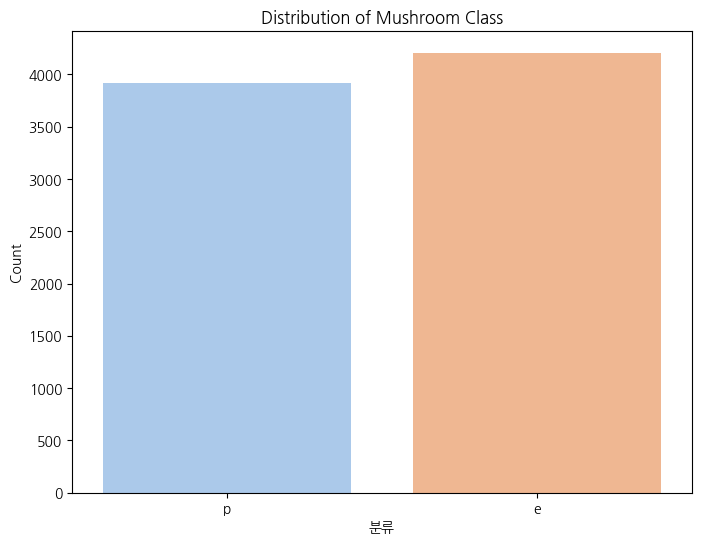

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='분류', palette='pastel')
plt.title('Distribution of Mushroom Class')
plt.xlabel('분류')
plt.ylabel('Count')
plt.show()

### Target 컬럼을 제외한 나머지 feature 시각화

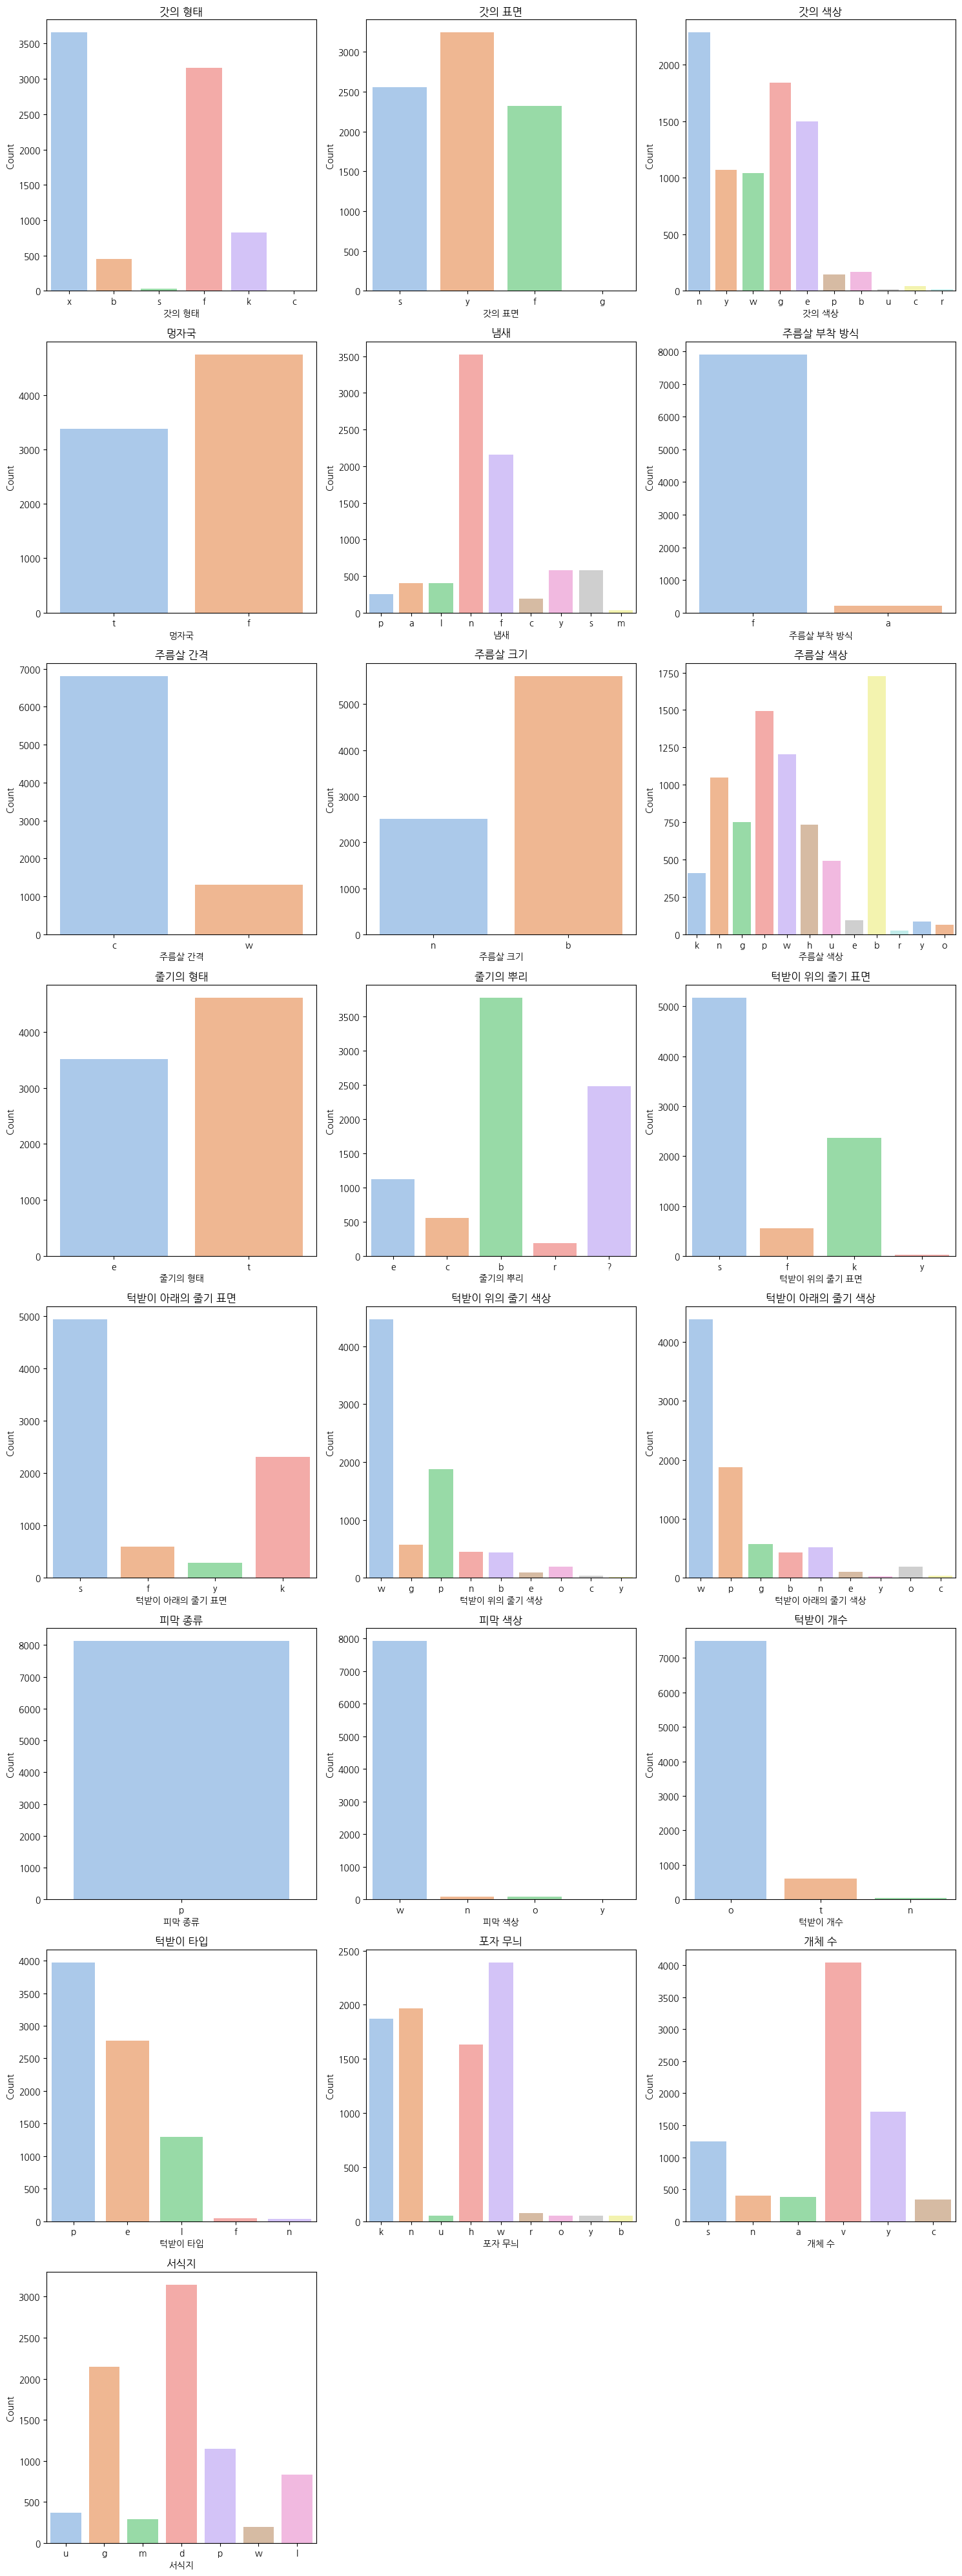

In [98]:
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

for i, col in enumerate(columns):
    r, c = divmod(i, n_cols)
    sns.countplot(data=df, x=col, ax=axs[r, c], palette='pastel')
    axs[r, c].set_title(col)
    axs[r, c].set_ylabel('Count')

for i in range(len(columns), n_rows * n_cols):
    r, c = divmod(i, n_cols)
    axs[r, c].axis('off')

plt.tight_layout()
plt.show()

### train test 데이터셋 나누기

In [91]:
# train, test = train_test_split(df, test_size=0.3, random_state=42)

# directory = 'data'
# if not os.path.exists(directory):
#     os.makedirs(directory)

# train.to_csv('./data/train.csv', encoding='utf-8-sig', index=False)
# test.to_csv('./data/test.csv', encoding='utf-8-sig', index=False)

In [141]:
train = pd.read_csv('./data/train.csv', encoding='utf-8')
test = pd.read_csv('./data/test.csv', encoding='utf-8')

In [142]:
train.head()

,분류,갓의 형태,갓의 표면,갓의 색상,멍자국,냄새,주름살 부착 방식,주름살 간격,주름살 크기,주름살 색상,...,턱받이 아래의 줄기 표면,턱받이 위의 줄기 색상,턱받이 아래의 줄기 색상,피막 종류,피막 색상,턱받이 개수,턱받이 타입,포자 무늬,개체 수,서식지
0,p,x,s,b,t,f,f,c,b,h,...,f,w,w,p,w,o,p,h,v,u
1,e,x,f,g,t,n,f,c,b,p,...,s,p,w,p,w,o,p,k,y,d
2,p,x,f,g,f,f,f,c,b,p,...,k,n,b,p,w,o,l,h,v,d
3,e,x,y,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,k,n,g
4,p,x,y,n,f,y,f,c,n,b,...,k,w,p,p,w,o,e,w,v,d


In [143]:
train.shape

(5686, 23)

In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   분류             5686 non-null   object
 1   갓의 형태          5686 non-null   object
 2   갓의 표면          5686 non-null   object
 3   갓의 색상          5686 non-null   object
 4   멍자국            5686 non-null   object
 5   냄새             5686 non-null   object
 6   주름살 부착 방식      5686 non-null   object
 7   주름살 간격         5686 non-null   object
 8   주름살 크기         5686 non-null   object
 9   주름살 색상         5686 non-null   object
 10  줄기의 형태         5686 non-null   object
 11  줄기의 뿌리         5686 non-null   object
 12  턱받이 위의 줄기 표면   5686 non-null   object
 13  턱받이 아래의 줄기 표면  5686 non-null   object
 14  턱받이 위의 줄기 색상   5686 non-null   object
 15  턱받이 아래의 줄기 색상  5686 non-null   object
 16  피막 종류          5686 non-null   object
 17  피막 색상          5686 non-null   object
 18  턱받이 개수         5686 non-null

In [146]:
train.nunique()

분류                2
갓의 형태             6
갓의 표면             4
갓의 색상            10
멍자국               2
냄새                9
주름살 부착 방식         2
주름살 간격            2
주름살 크기            2
주름살 색상           12
줄기의 형태            2
줄기의 뿌리            5
턱받이 위의 줄기 표면      4
턱받이 아래의 줄기 표면     4
턱받이 위의 줄기 색상      9
턱받이 아래의 줄기 색상     9
피막 종류             1
피막 색상             4
턱받이 개수            3
턱받이 타입            5
포자 무늬             9
개체 수              6
서식지               7
dtype: int64

In [147]:
train['분류'].value_counts()

분류
e    2951
p    2735
Name: count, dtype: int64

In [148]:
train['멍자국'].value_counts()

멍자국
f    3322
t    2364
Name: count, dtype: int64

In [149]:
train['주름살 부착 방식'].value_counts()

주름살 부착 방식
f    5534
a     152
Name: count, dtype: int64

In [150]:
train['주름살 간격'].value_counts()

주름살 간격
c    4781
w     905
Name: count, dtype: int64

In [151]:
train['주름살 크기'].value_counts()

주름살 크기
b    3941
n    1745
Name: count, dtype: int64

In [152]:
train['줄기의 형태'].value_counts()

줄기의 형태
t    3244
e    2442
Name: count, dtype: int64

In [136]:
test.head()

,분류,갓의 형태,갓의 표면,갓의 색상,멍자국,냄새,주름살 부착 방식,주름살 간격,주름살 크기,주름살 색상,...,턱받이 아래의 줄기 표면,턱받이 위의 줄기 색상,턱받이 아래의 줄기 색상,피막 종류,피막 색상,턱받이 개수,턱받이 타입,포자 무늬,개체 수,서식지
0,e,f,f,n,f,n,f,w,b,h,...,f,w,w,p,w,o,e,n,s,g
1,p,f,s,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
2,p,x,y,n,f,f,f,c,n,b,...,s,w,p,p,w,o,e,w,v,l
3,e,f,y,g,t,n,f,c,b,n,...,s,g,p,p,w,o,p,n,y,d
4,p,f,s,e,f,s,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l


In [96]:
test.shape

(2438, 23)

### train target / train target 제외 그래프

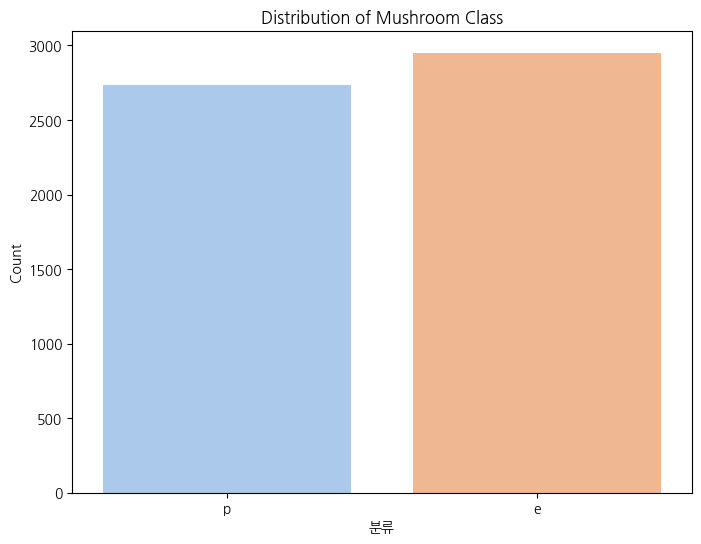

In [97]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='분류', palette='pastel')
plt.title('Distribution of Mushroom Class')
plt.xlabel('분류')
plt.ylabel('Count')
plt.show()

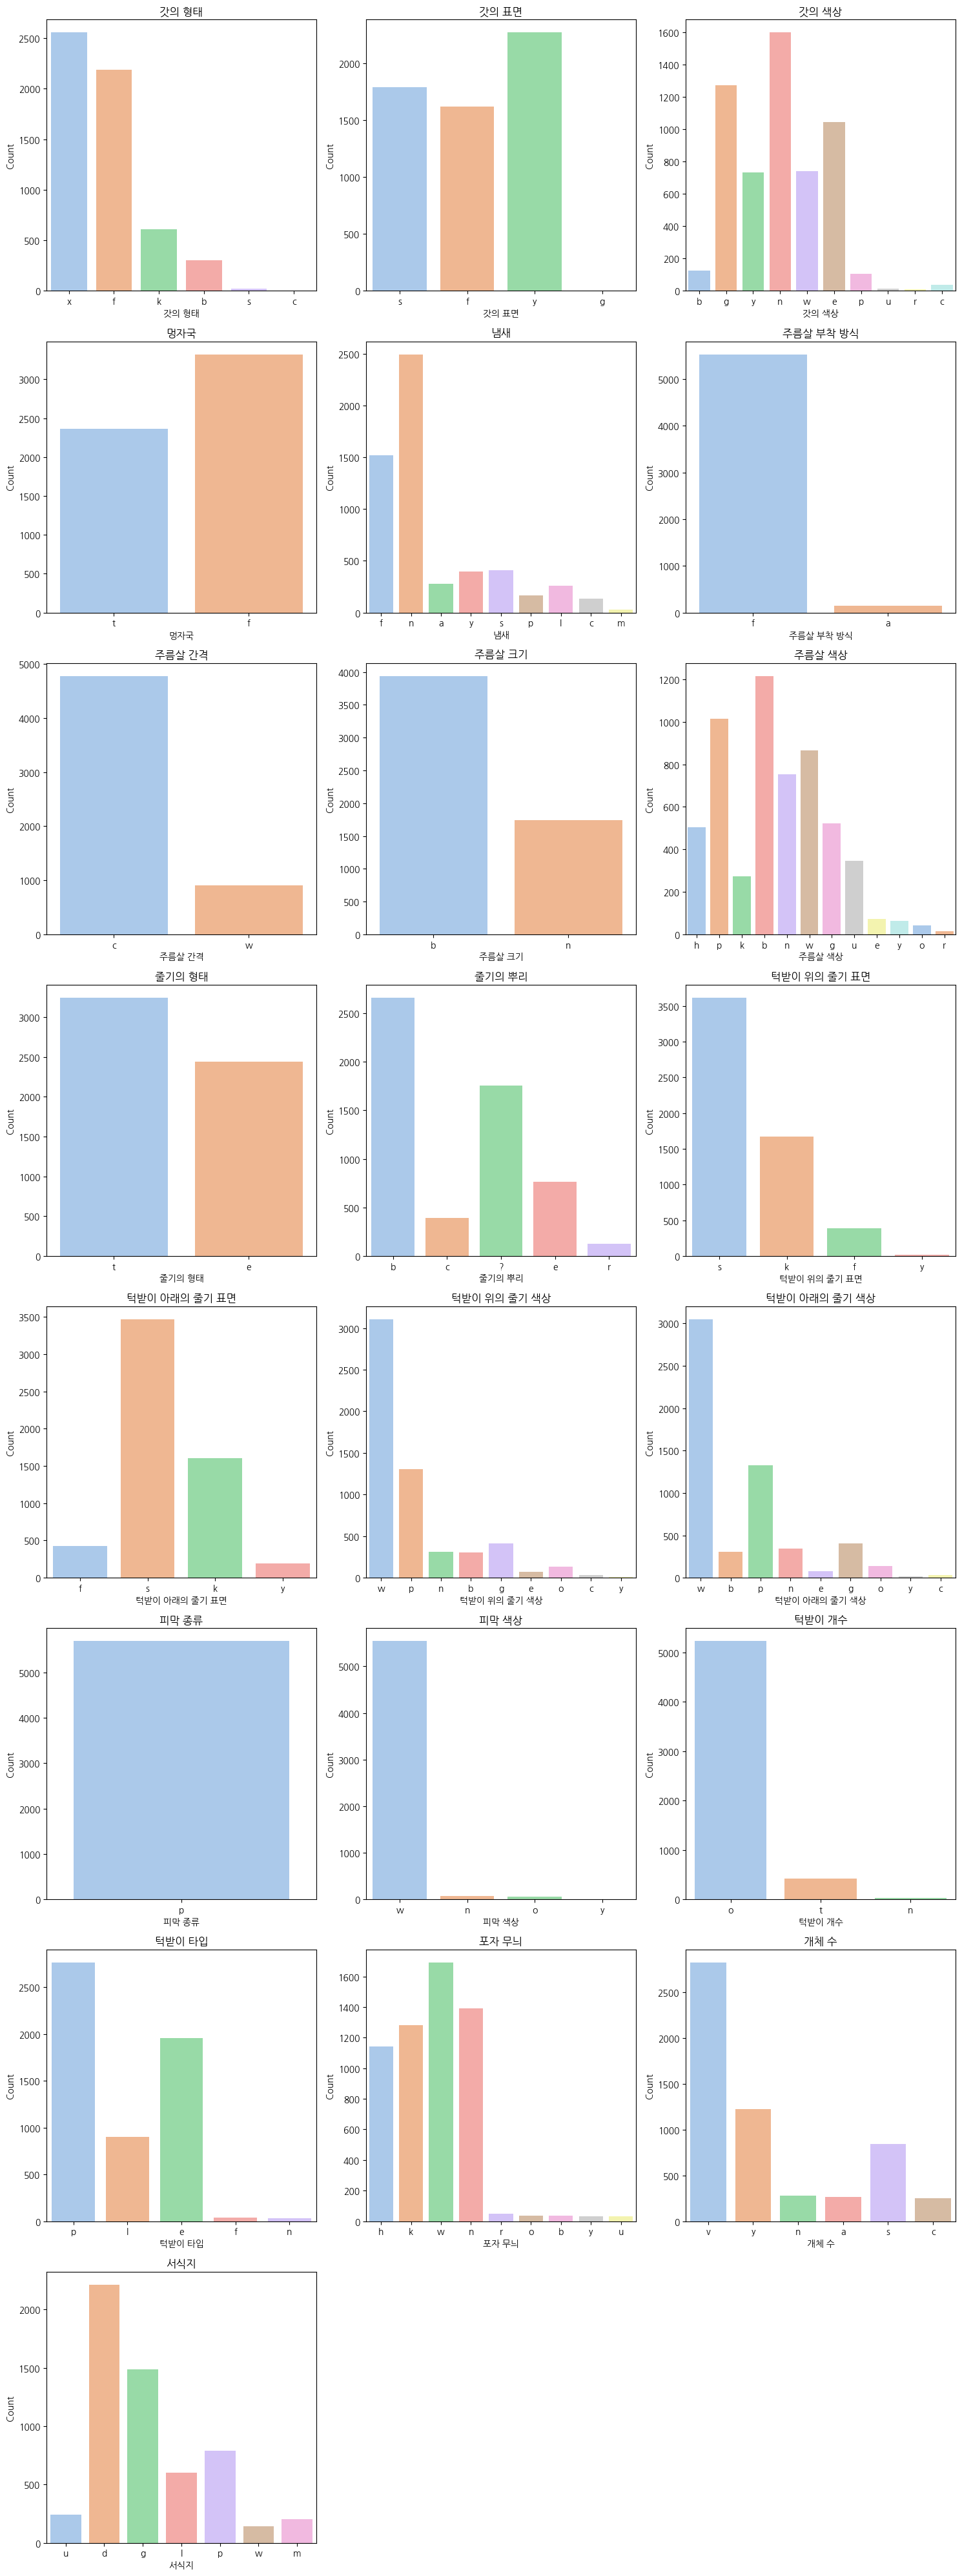

In [99]:
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

for i, col in enumerate(columns):
    r, c = divmod(i, n_cols)
    sns.countplot(data=train, x=col, ax=axs[r, c], palette='pastel')
    axs[r, c].set_title(col)
    axs[r, c].set_ylabel('Count')

for i in range(len(columns), n_rows * n_cols):
    r, c = divmod(i, n_cols)
    axs[r, c].axis('off')

plt.tight_layout()
plt.show()

### train - Dummy Encoding *

In [153]:
one_hot_encoded_columns = []
dummy_encoded_columns = []

for col in train.columns:
    
    oh = True
    dm = True
    
    if train[col].nunique() == 2:
        if oh:
            one_hot_encoded_columns.append(col)
            oh = False
            train[col] = pd.get_dummies(train[col], drop_first=True, prefix=str(col))
    
    elif (train[col].nunique() > 2 and train[col].nunique() < 17):
        if dm:
            dummy_encoded_columns.append(col)
            dm = False
            train = pd.concat([train.drop([col], axis=1), pd.get_dummies(train[col], drop_first=True, prefix=str(col))], axis=1)



print("\033[1m원-핫 인코딩된 변수:\033[0m")
for col in one_hot_encoded_columns:
    print(col)

print("\n\033[1m더미 인코딩된 변수:\033[0m")
for col in dummy_encoded_columns:
    print(col)

train.shape

원-핫 인코딩된 변수:
분류
멍자국
주름살 부착 방식
주름살 간격
주름살 크기
줄기의 형태

더미 인코딩된 변수:
갓의 형태
갓의 표면
갓의 색상
냄새
주름살 색상
줄기의 뿌리
턱받이 위의 줄기 표면
턱받이 아래의 줄기 표면
턱받이 위의 줄기 색상
턱받이 아래의 줄기 색상
피막 색상
턱받이 개수
턱받이 타입
포자 무늬
개체 수
서식지


(5686, 97)

원- 핫 인코딩 변환  
분류 - e : False / p : True  
멍자국 - f : False / t : True  
주름살 부착 방식 - f : True / a : False  
주름살 간격 - c : False / w : True   
주름살 크기 - b : False / n : True  
줄기의 형태 - t : True / e  : False 

In [154]:
train.head()

,분류,멍자국,주름살 부착 방식,주름살 간격,주름살 크기,줄기의 형태,피막 종류,갓의 형태_c,갓의 형태_f,갓의 형태_k,...,개체 수_n,개체 수_s,개체 수_v,개체 수_y,서식지_g,서식지_l,서식지_m,서식지_p,서식지_u,서식지_w
0,True,True,True,False,False,True,p,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,True,True,False,False,True,p,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,False,p,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,True,True,False,False,False,p,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,True,False,True,False,True,True,p,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [155]:
train['분류'].value_counts()

분류
False    2951
True     2735
Name: count, dtype: int64

In [156]:
train['멍자국'].value_counts()

멍자국
False    3322
True     2364
Name: count, dtype: int64

In [157]:
train['주름살 부착 방식'].value_counts()

주름살 부착 방식
True     5534
False     152
Name: count, dtype: int64

In [158]:
train['주름살 간격'].value_counts()

주름살 간격
False    4781
True      905
Name: count, dtype: int64

In [159]:
train['주름살 크기'].value_counts()

주름살 크기
False    3941
True     1745
Name: count, dtype: int64

In [160]:
train['줄기의 형태'].value_counts()

줄기의 형태
True     3244
False    2442
Name: count, dtype: int64

#### One-hot Encoding, Dummy Encoding으로도 변환되지 않은 피막 종류 변환

In [139]:
train['피막 종류'] = True
train['피막 종류'].value_counts()

피막 종류
True    5686
Name: count, dtype: int64

In [140]:
train.head()

,분류,멍자국,주름살 부착 방식,주름살 간격,주름살 크기,줄기의 형태,피막 종류,갓의 형태_c,갓의 형태_f,갓의 형태_k,...,개체 수_n,개체 수_s,개체 수_v,개체 수_y,서식지_g,서식지_l,서식지_m,서식지_p,서식지_u,서식지_w
0,True,True,True,False,False,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,True,True,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,True,False,True,False,True,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [132]:
train = train.astype('int')
train

,분류,멍자국,주름살 부착 방식,주름살 간격,주름살 크기,줄기의 형태,피막 종류,갓의 형태_c,갓의 형태_f,갓의 형태_k,...,개체 수_n,개체 수_s,개체 수_v,개체 수_y,서식지_g,서식지_l,서식지_m,서식지_p,서식지_u,서식지_w
0,1,1,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,1,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,0,1,0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,1,0,1,0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5682,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5683,0,1,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
5684,1,0,1,0,1,1,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


## Target 설정(X,Y)  / train, vaild 데이터셋 나누기

### Train Test 데이터 셋 나누기

In [76]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
if os.
train.to_csv(

### X,Y 선별